In [4]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from segmentflow import segment, view
from skimage import measure
%load_ext autoreload
%autoreload 2

Developed from mhe-analysis NB 36

In [19]:
def get_dims_df(imgs_labeled):
    # Format segmented data
    dims_df = pd.DataFrame(measure.regionprops_table(
        imgs_labeled, properties=['label', 'area', 'bbox']))
    dims_df = dims_df.rename(columns={'area' : 'volume'})
    # Calculate nslices by subtracting z min from max
    dims_df['nslices'] = (
        dims_df['bbox-3'].to_numpy() - dims_df['bbox-0'].to_numpy())
    # Calculate nrows by subtracting y min from max
    dims_df['nrows'] = (
        dims_df['bbox-4'].to_numpy() - dims_df['bbox-1'].to_numpy())
    # Calculate ncols by subtracting x min from max
    dims_df['ncols'] = (
        dims_df['bbox-5'].to_numpy() - dims_df['bbox-2'].to_numpy())
    return dims_df

def simulate_sieve(dims_df, bin_edges, pixel_res):
    # Define dimensions a, b, c with a as largest and c as smallest
    dims_df['a'] = dims_df.apply(
        lambda row: row['nslices' : 'ncols'].nlargest(3).iloc[0], axis=1)
    dims_df['b'] = dims_df.apply(
        lambda row: row['nslices' : 'ncols'].nlargest(3).iloc[1], axis=1)
    dims_df['c'] = dims_df.apply(
        lambda row: row['nslices' : 'ncols'].nlargest(3).iloc[2], axis=1)
    # Apply pixel resolution to second smallest dimension
    b_ums = pixel_res * dims_df['b'].to_numpy()
    n_particles, sieve_sizes = np.histogram(b_ums, bins=bin_edges)
    return n_particles, sieve_sizes

def grading_curve(
    n_particles, sieve_sizes, standard_n_particles=None
):
    n_particles = np.insert(n_particles, 0, 0)
    # seg_pct = 100 * seg_hist / dims_df.shape[0]
    pct_particles = 100 * n_particles / np.sum(n_particles)
    # Plot histogram
    fig, ax = plt.subplots(
        figsize=(8, 5), facecolor='white', constrained_layout=True, dpi=300)
    # ax.scatter(diameter_ums, np.cumsum(f50_pct), s=10, zorder=3)
    # ax.plot(
    #     diameter_ums, np.cumsum(f50_pct), linewidth=2, zorder=3, label='F50 Standard')
    # Plot segmented particle size distributions
    # seg_i_pct = sieve_df[f'seg-aspect-pct'].to_numpy()
    # seg_i_pct_cum = np.cumsum(seg_i_pct)
    print(f'{sieve_sizes=}')
    print(f'{np.cumsum(pct_particles)=}')
    ax.scatter(sieve_sizes, np.cumsum(pct_particles), s=10, zorder=2)
    ax.plot(
        sieve_sizes, np.cumsum(pct_particles), label='Segmented',
        linewidth=1, zorder=2
    )
    if standard_n_particles is not None:
        # standard_n_particles = np.insert(standard_n_particles, 0, 0)
        print(f'{sieve_sizes=}')
        print(f'{np.cumsum(standard_n_particles)=}')
        ax.scatter(sieve_sizes, np.cumsum(standard_n_particles), s=10, zorder=2)
        ax.plot(
            sieve_sizes, np.cumsum(standard_n_particles), label='Standard',
            linewidth=1, zorder=2
        )
    ax.set_title('Segmented Particle Size Distribution by Aspect Ratio')
    ax.set_ylabel(r'Retained (%)')
    ax.set_ylim([0, 111])
    ax.set_xlabel('Particle diameter ($\mu m$)')
    # ax.set_xscale('log')
    ax.grid(True, axis='y', zorder=0)
    # ax.set_xlim([53, 850])
    # for v in np.concatenate(
    #     (np.arange(60, 100, 10, dtype=int), np.arange(100, 900, 100, dtype=int))):
    #     ax.axvline(v, linewidth=1, c='k', alpha=0.25, zorder=0)
    ax.set_xticks(sieve_sizes)
    ax.set_xticklabels(sieve_sizes)
    ax.legend(loc='lower right', ncol=1)
    return fig, ax

## Plot STL-0 Size Distribution

In [ ]:
csv_path = Path(
    r'C:\Users\cgusb\Research\PSAAP\alshibli_1551_study'
    r'\alshibli-1551-bounds.csv')
dims_df = pd.read_csv(csv_path)
f50_bin_edges = [53,  75, 106, 150, 212, 300,  425, 600, 850]
f50_standard =  [ 0, 0.2,   3,  15,  37,  34, 10.5, 0.3,   0]
ct_res = 2.02  # ums/voxels
n_particles, sieve_sizes = simulate_sieve(
    dims_df, f50_bin_edges, pixel_res=ct_res)
fig, ax = grading_curve(
    n_particles, f50_bin_edges, standard_n_particles=f50_standard)
plt.show()

## Outputs 10, 20, 40, 80

CT resolution: 294.3864
Loading images...
--> Images loaded as 3D array:  (10, 15, 15)
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(pct_particles)=array([  0.,   0.,   0.,   0.,   0.,  60.,  60., 100., 100.])
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(standard_n_particles)=array([  0. ,   0.2,   3.2,  18.2,  55.2,  89.2,  99.7, 100. , 100. ])


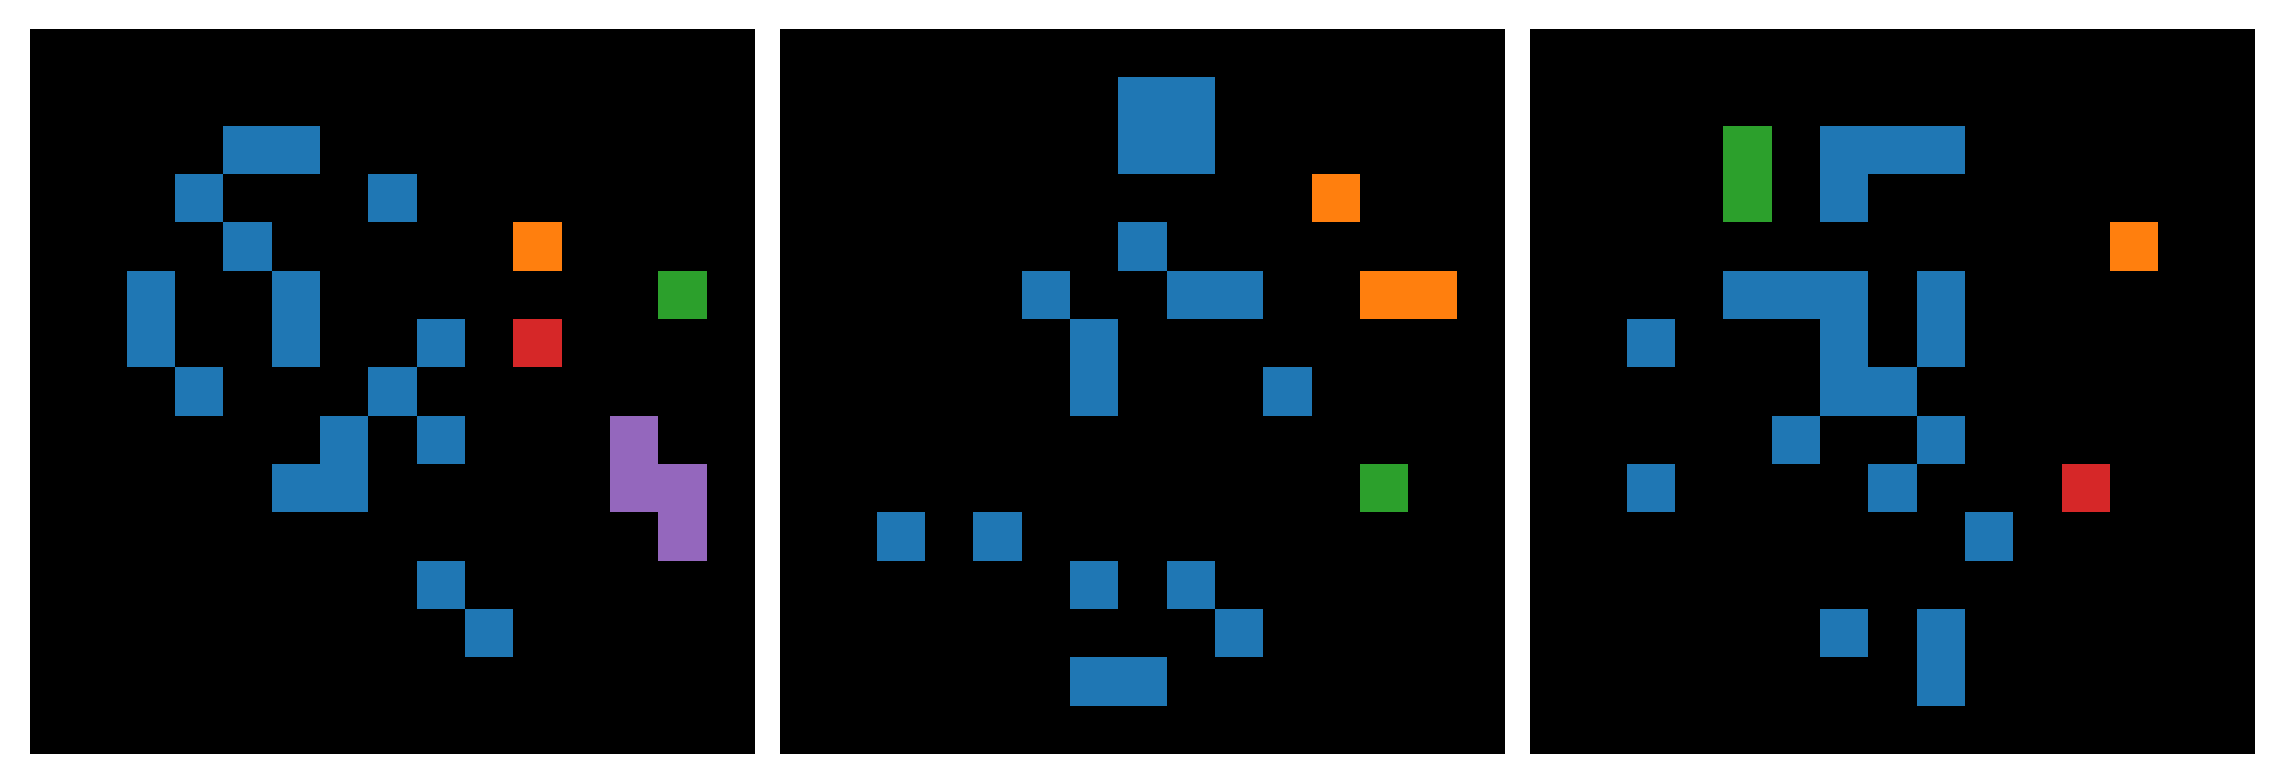

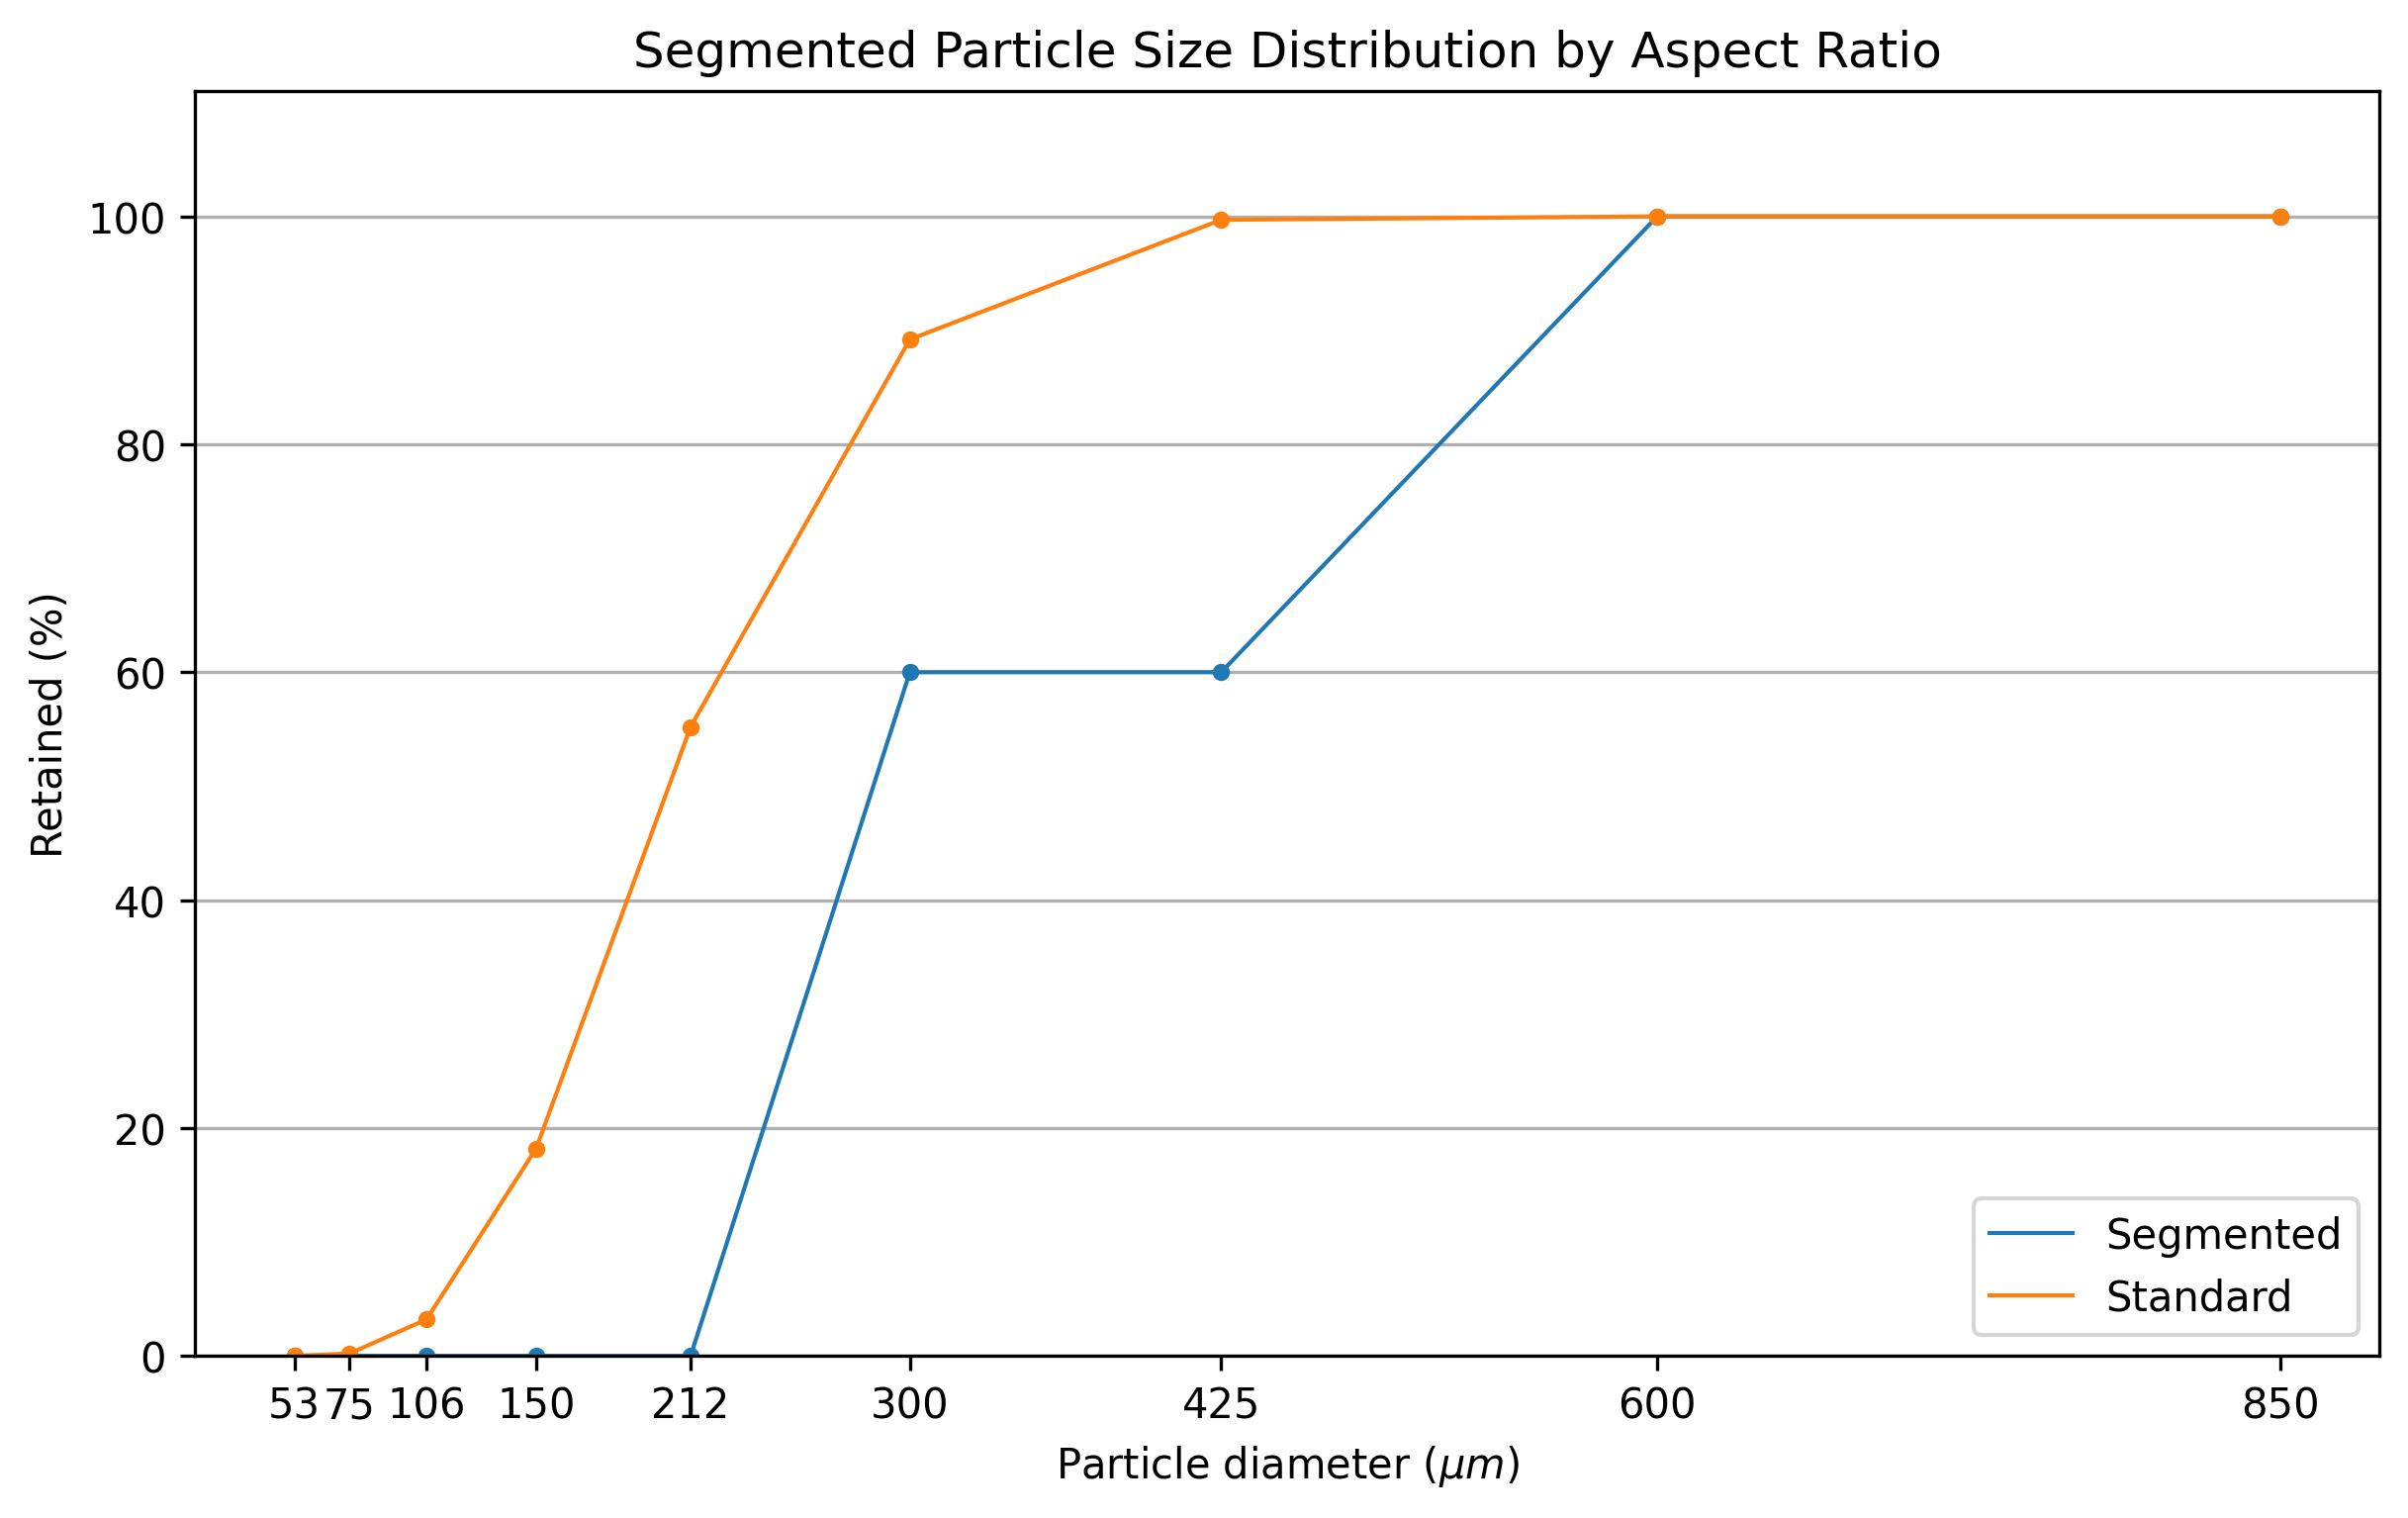

CT resolution: 147.1932
Loading images...
--> Images loaded as 3D array:  (20, 30, 30)
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(pct_particles)=array([  0.        ,   0.        ,   0.        ,  52.38095238,
        52.38095238,  84.12698413,  84.12698413,  98.41269841,
       100.        ])
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(standard_n_particles)=array([  0. ,   0.2,   3.2,  18.2,  55.2,  89.2,  99.7, 100. , 100. ])


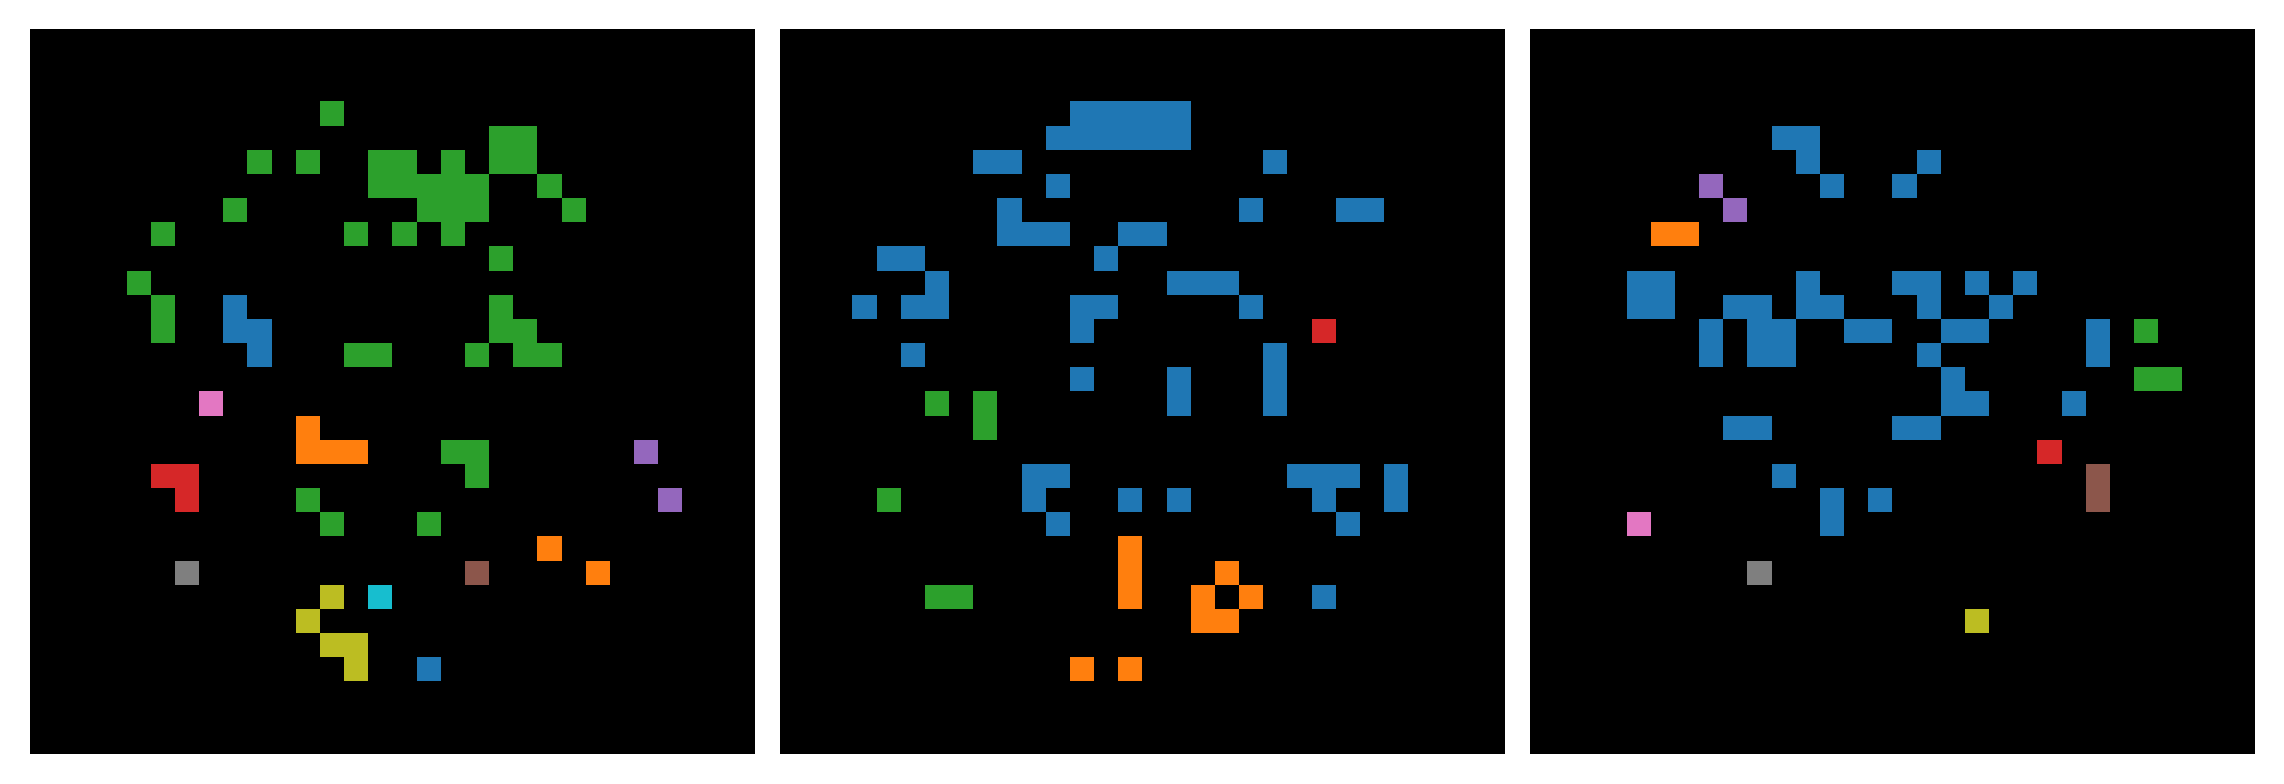

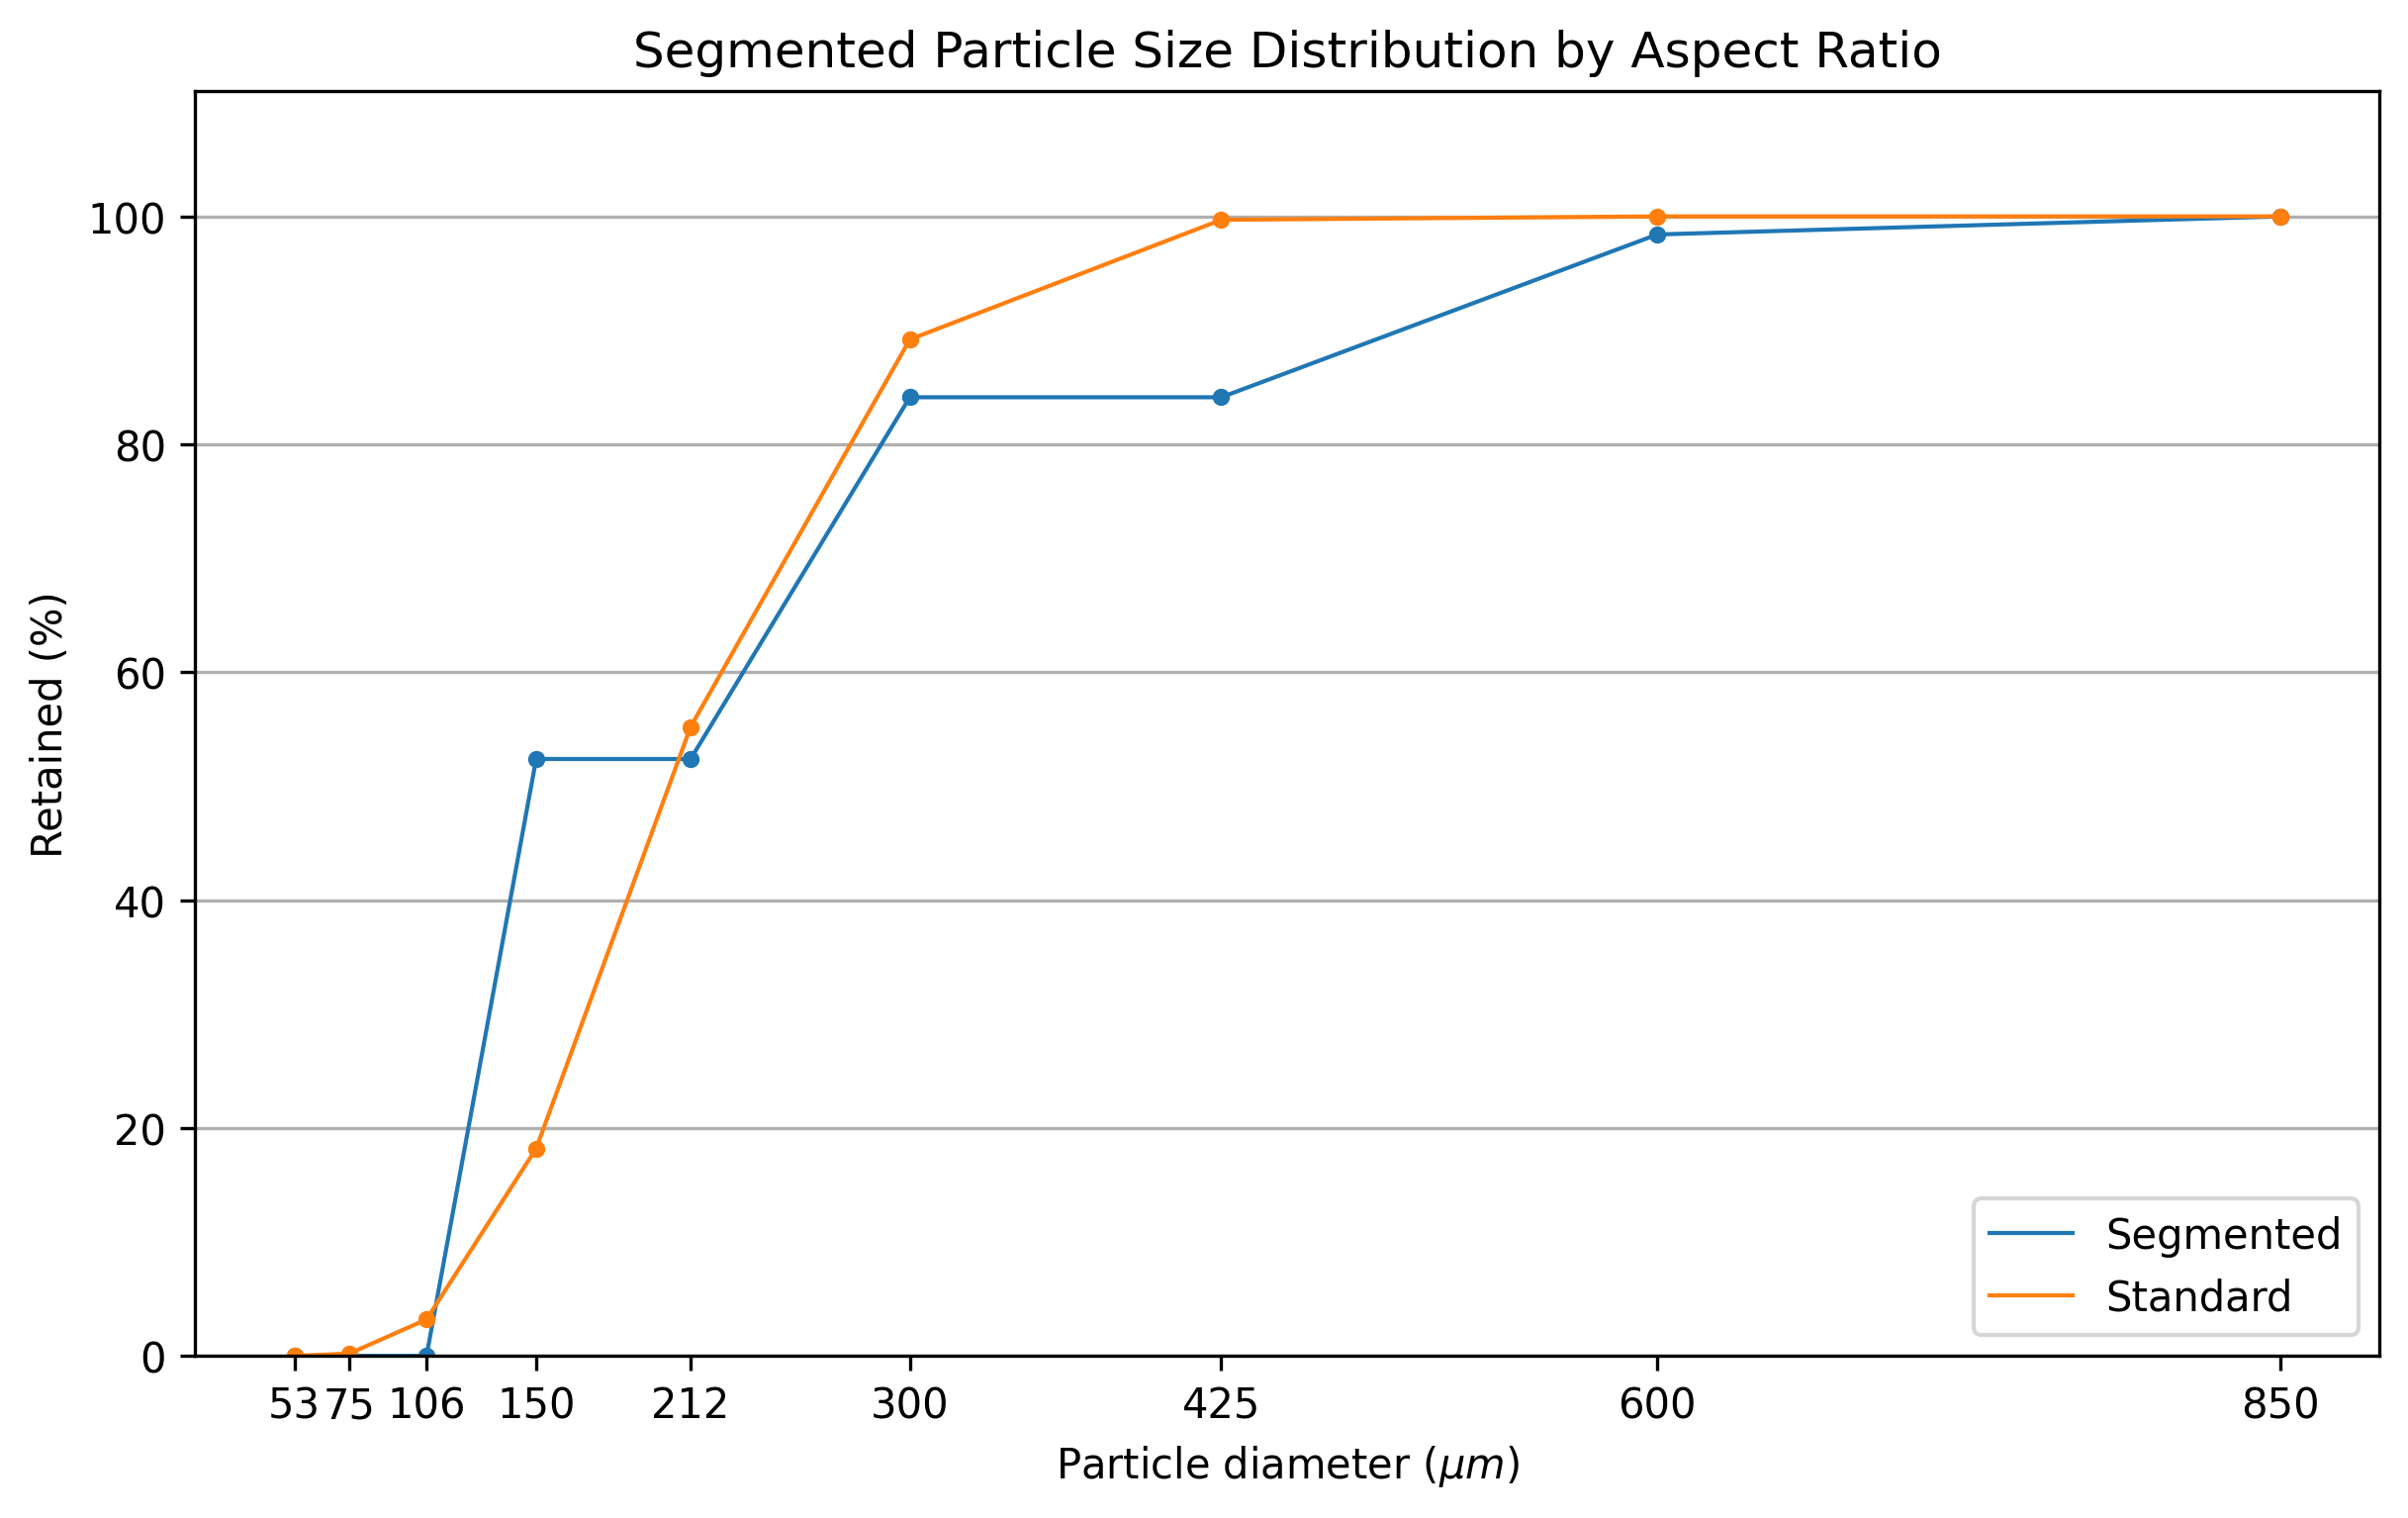

CT resolution: 73.5966
Loading images...
--> Images loaded as 3D array:  (40, 60, 60)
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(pct_particles)=array([  0.        ,  13.82536383,  13.82536383,  27.33887734,
        27.33887734,  76.92307692,  90.54054054,  99.58419958,
       100.        ])
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(standard_n_particles)=array([  0. ,   0.2,   3.2,  18.2,  55.2,  89.2,  99.7, 100. , 100. ])


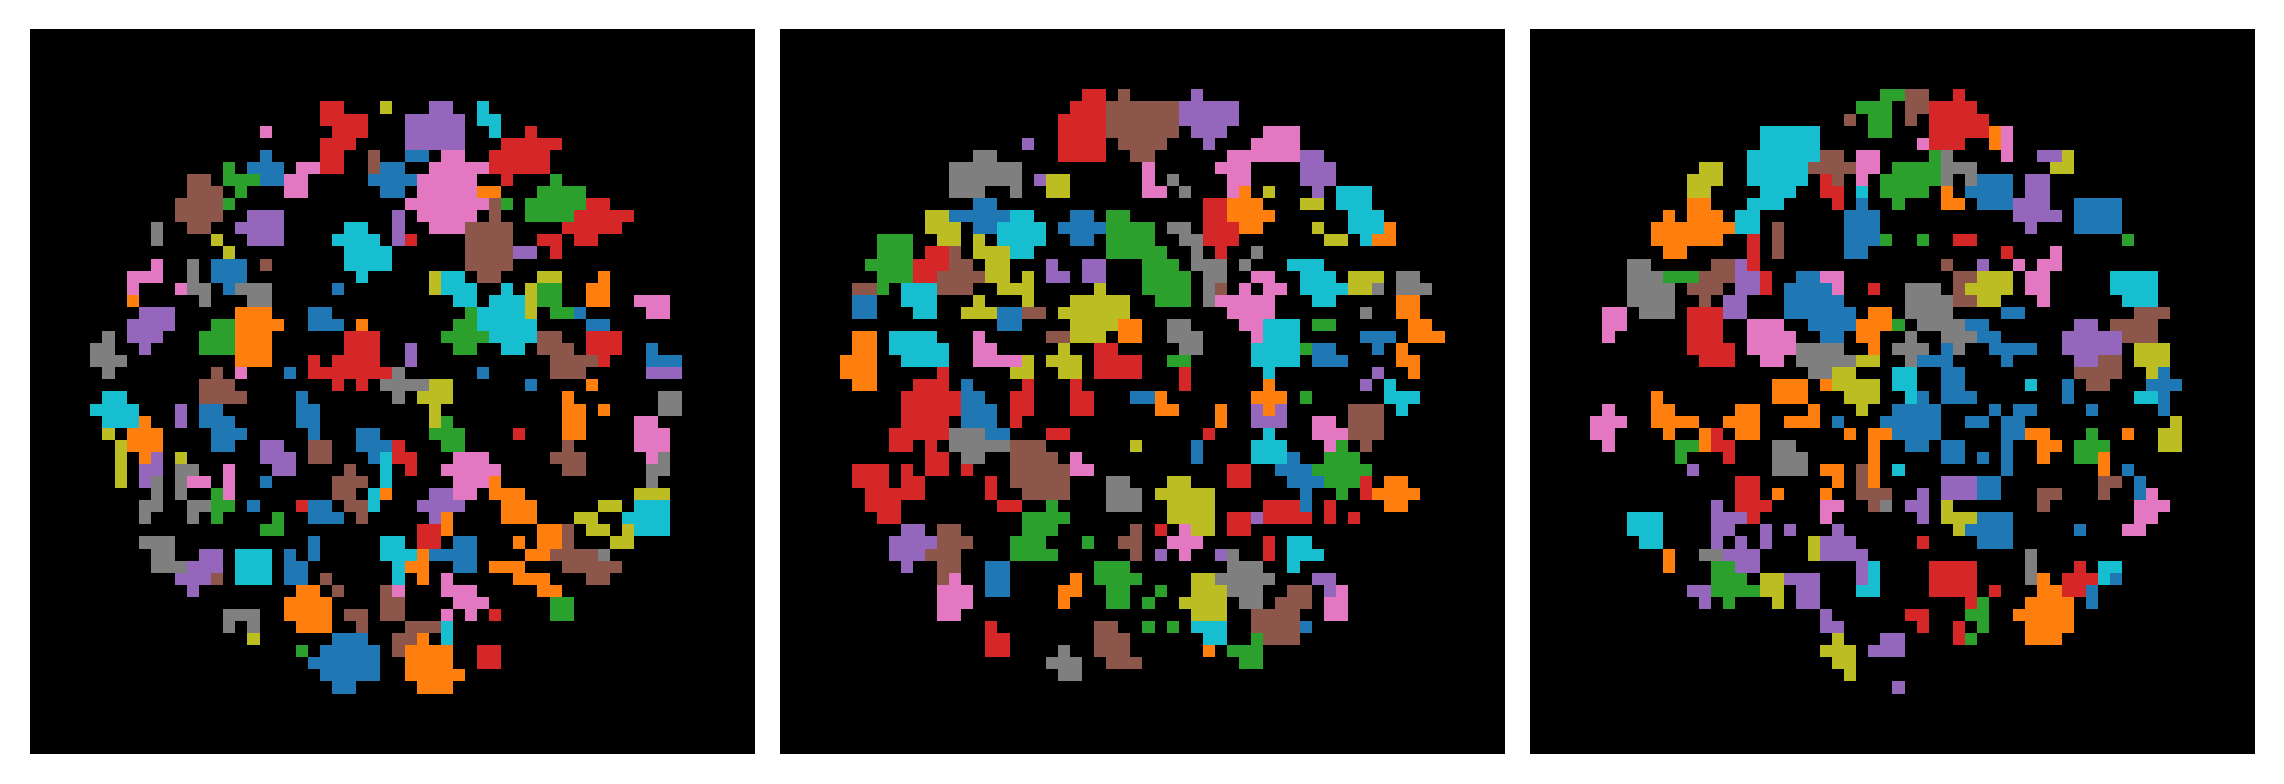

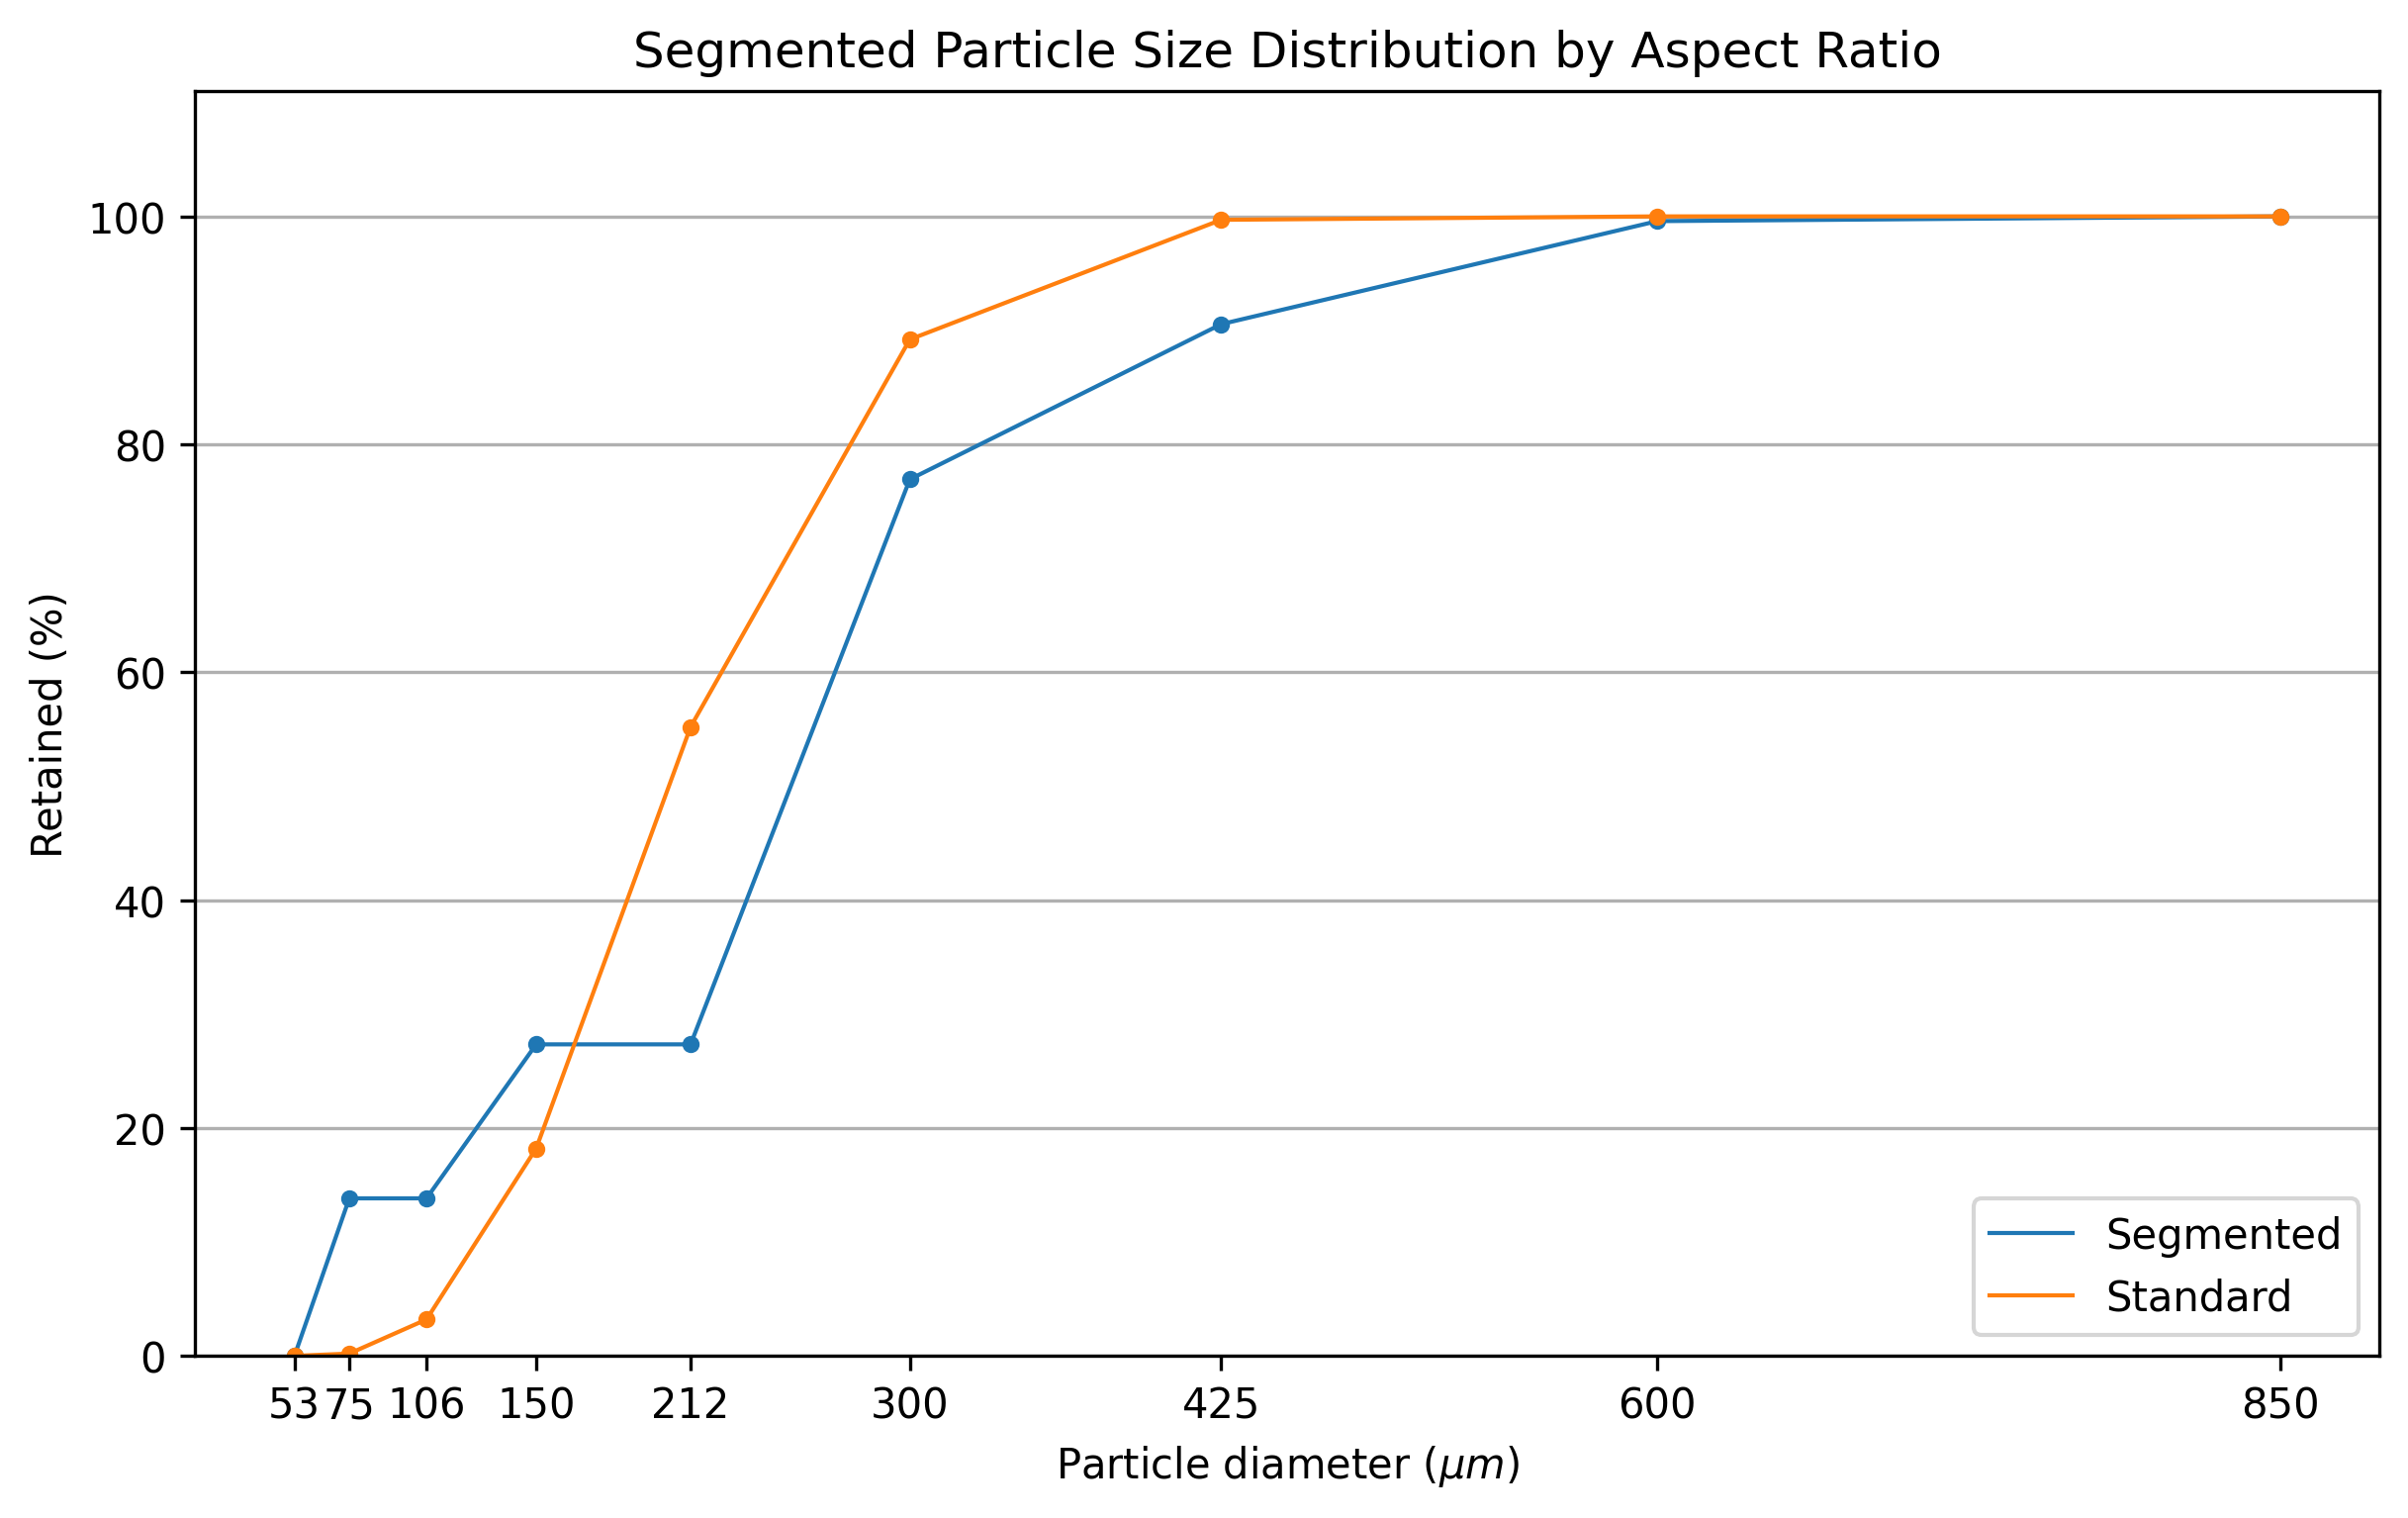

CT resolution: 36.7983
Loading images...
--> Images loaded as 3D array:  (80, 120, 120)
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(pct_particles)=array([  0.        ,   9.19301165,   9.19301165,  36.81364393,
        50.70715474,  83.69384359,  97.83693844, 100.        ,
       100.        ])
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(standard_n_particles)=array([  0. ,   0.2,   3.2,  18.2,  55.2,  89.2,  99.7, 100. , 100. ])


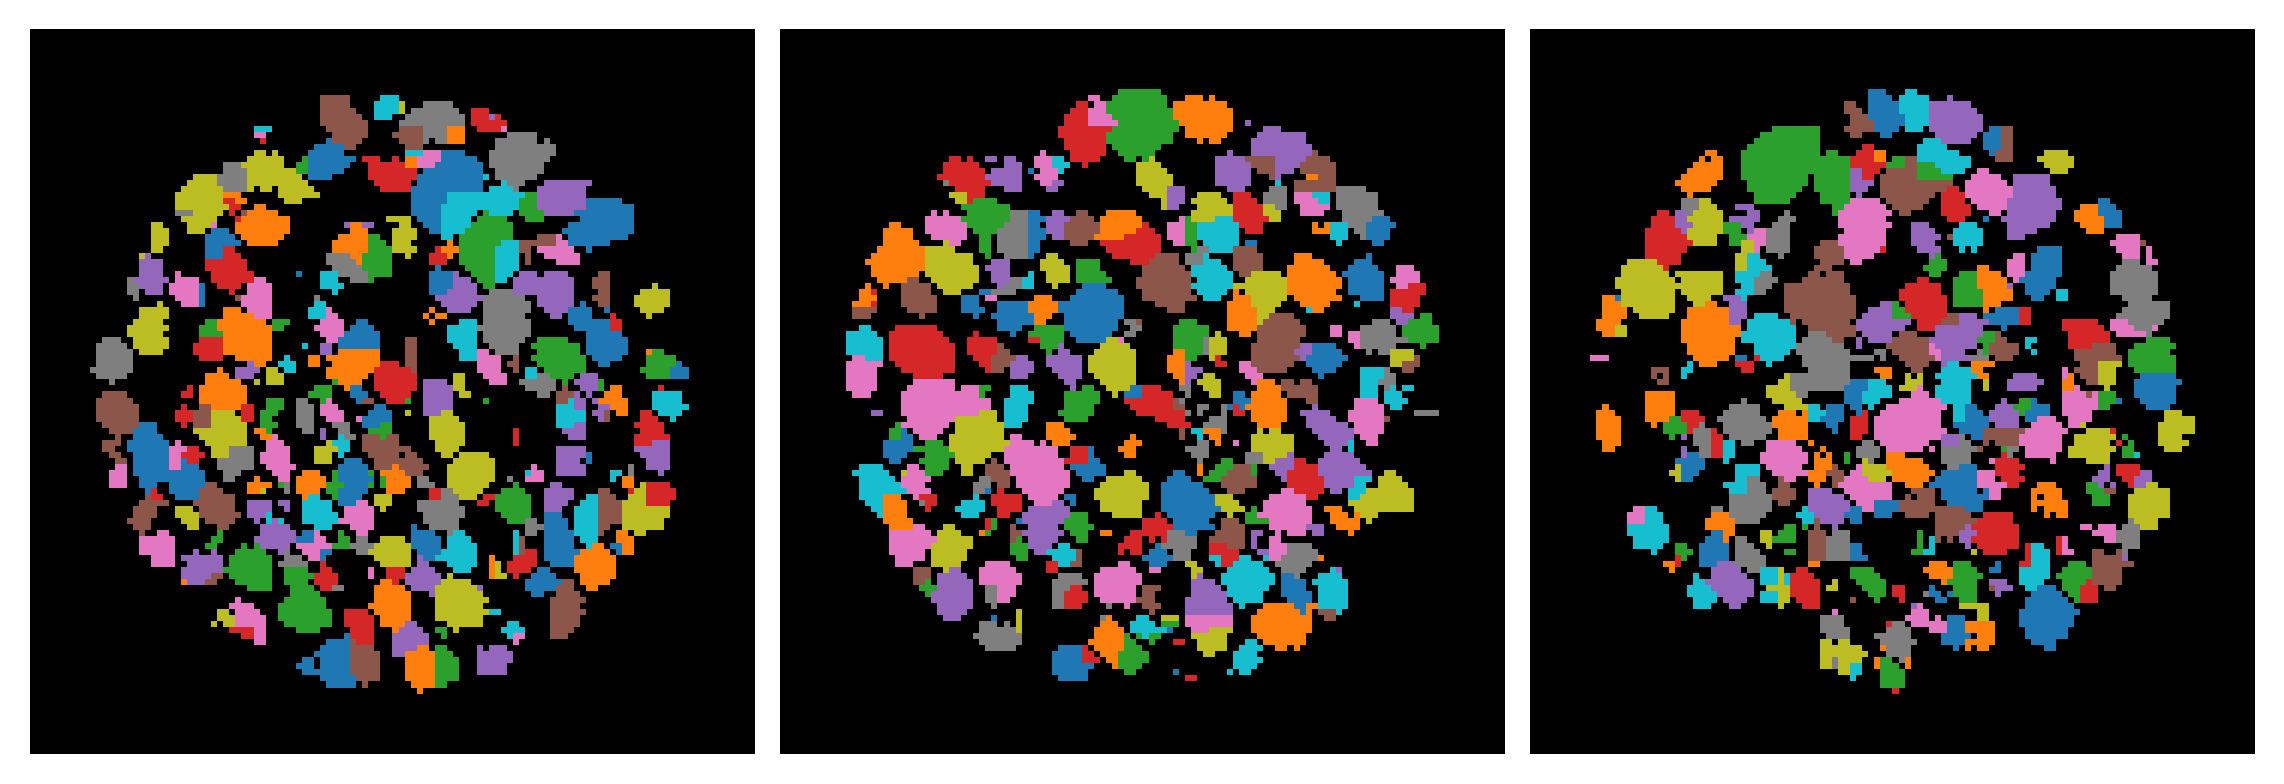

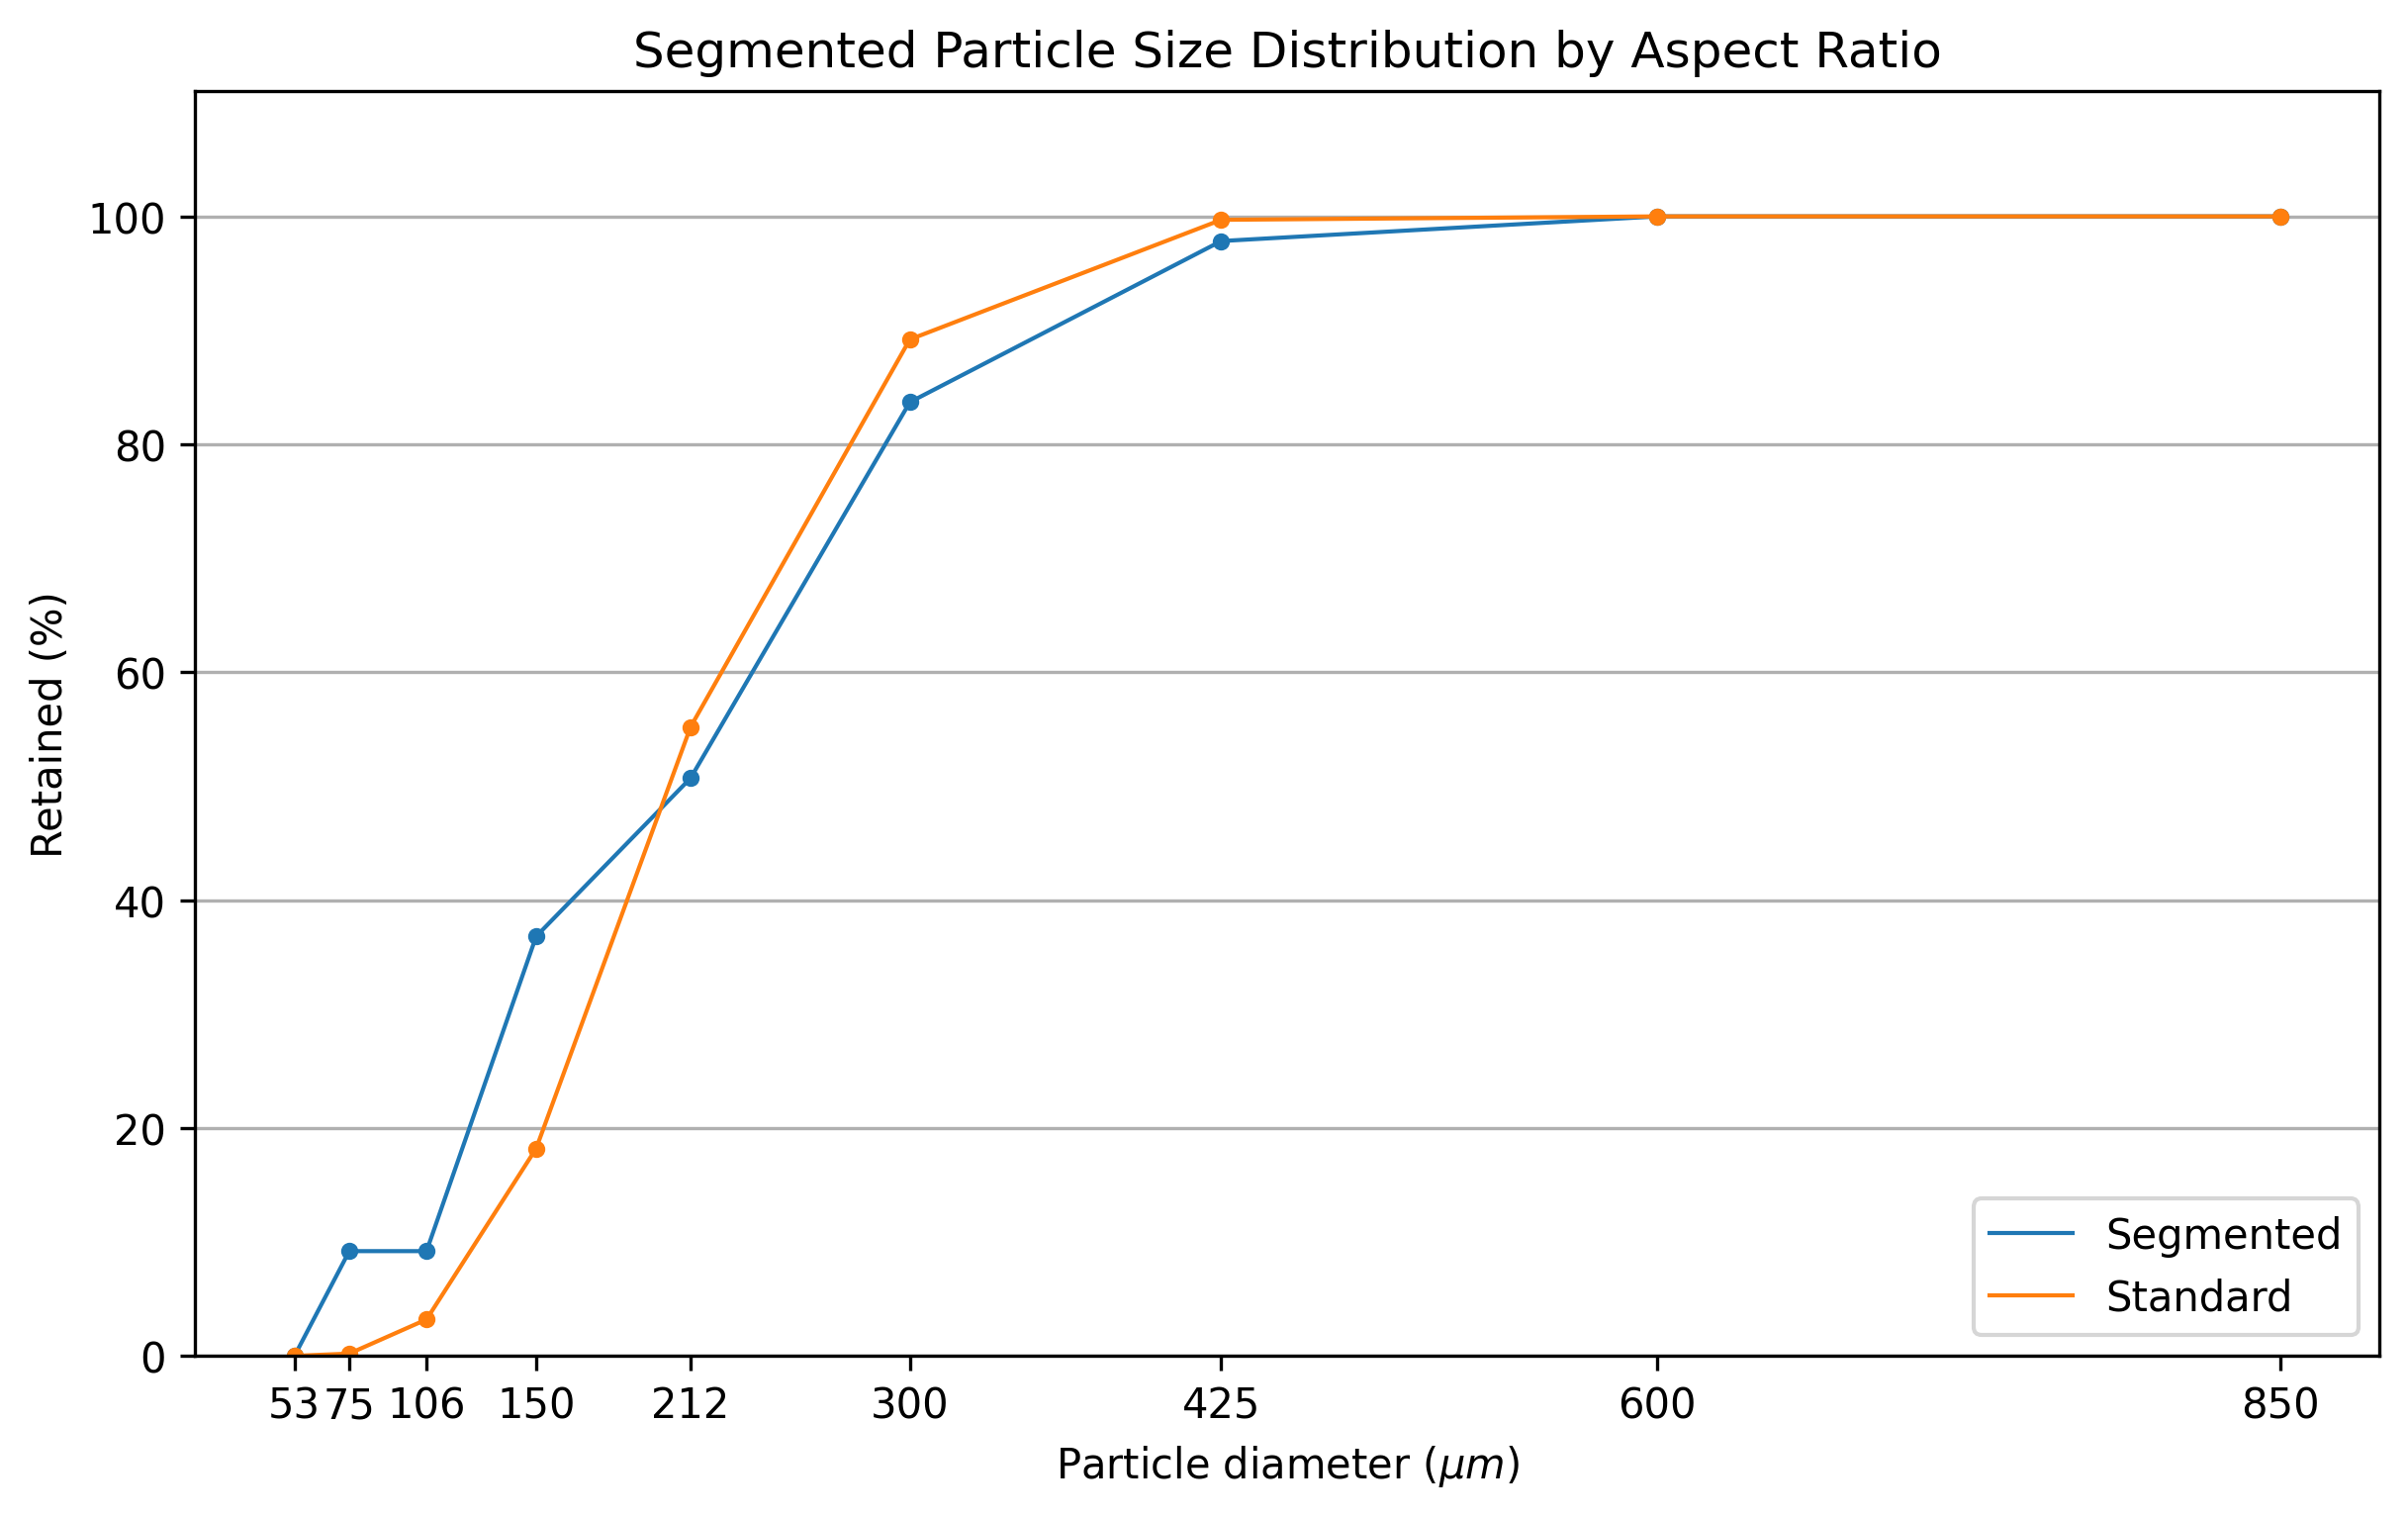

In [20]:
resolutions = {
    10  : 294.3864,
    20  : 147.1932,
    40  : 73.5966,
    80  : 36.7983,
    # 160 : 18.39915,
    # 320 : 9.199575,
}
for n_grid_voxels, ct_res in resolutions.items():
    print('CT resolution:', ct_res)
    img_dir_path = Path(
        f'segmentflow_output/output_{str(n_grid_voxels).zfill(3)}'
        f'/output_{str(n_grid_voxels).zfill(3)}_labeled_voxels')
    imgs_labeled = segment.load_images(img_dir_path, file_suffix='tif')
    fig, axes = view.plot_color_labels(
        imgs_labeled, nslices=3, exclude_bounding_slices=True, fig_w=7.5,
        dpi=300
    )
    # Based on IDOX "Full Production" doc
    # idox_bin_edges = np.array([0, 45, 75, 150, 300])
    # idox_standard = [33, 17, 0, 47.5]
    dims_df = get_dims_df(imgs_labeled)
    n_particles, sieve_sizes = simulate_sieve(
        dims_df, f50_bin_edges, pixel_res=ct_res)
    fig, ax = grading_curve(
        n_particles, f50_bin_edges, standard_n_particles=f50_standard)
    plt.show()

## Output 160, MPD 1 - 3

Minimum peak distance: 1
CT resolution: 18.39915
Loading images...
--> Images loaded as 3D array:  (160, 240, 240)
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(pct_particles)=array([  0.        ,  13.64130435,  19.51086957,  39.1576087 ,
        61.63043478,  88.09782609,  99.42934783, 100.        ,
       100.        ])
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(standard_n_particles)=array([  0. ,   0.2,   3.2,  18.2,  55.2,  89.2,  99.7, 100. , 100. ])


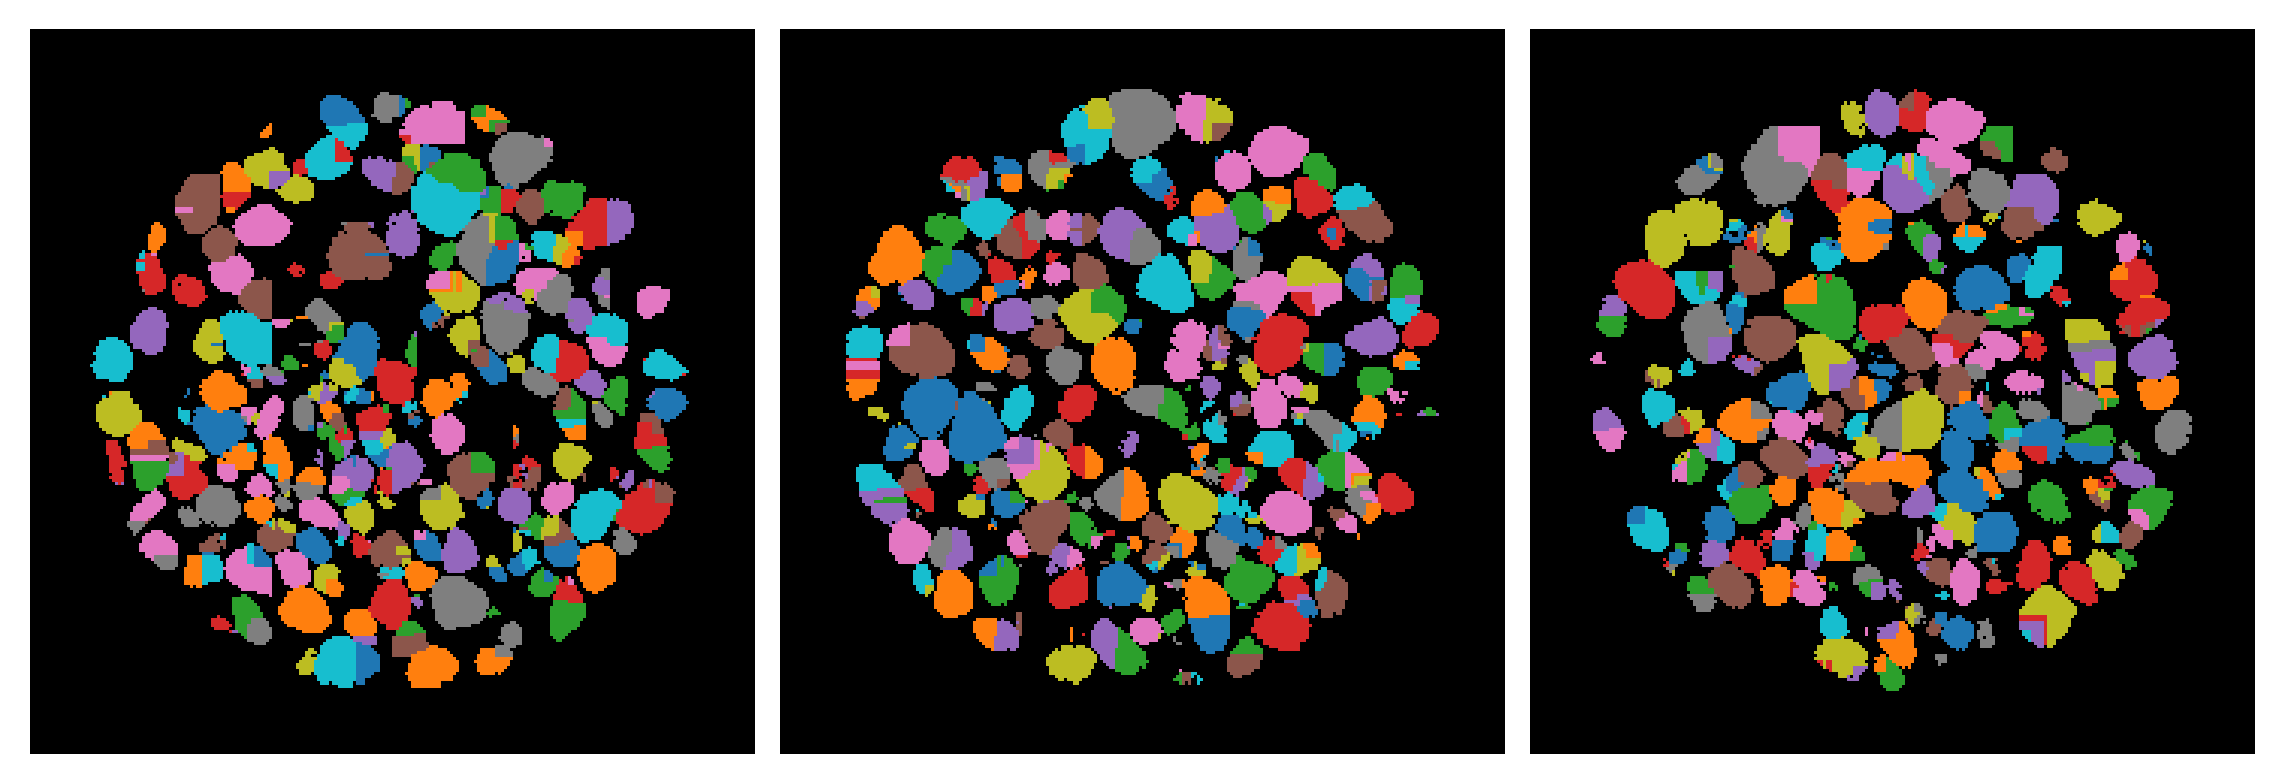

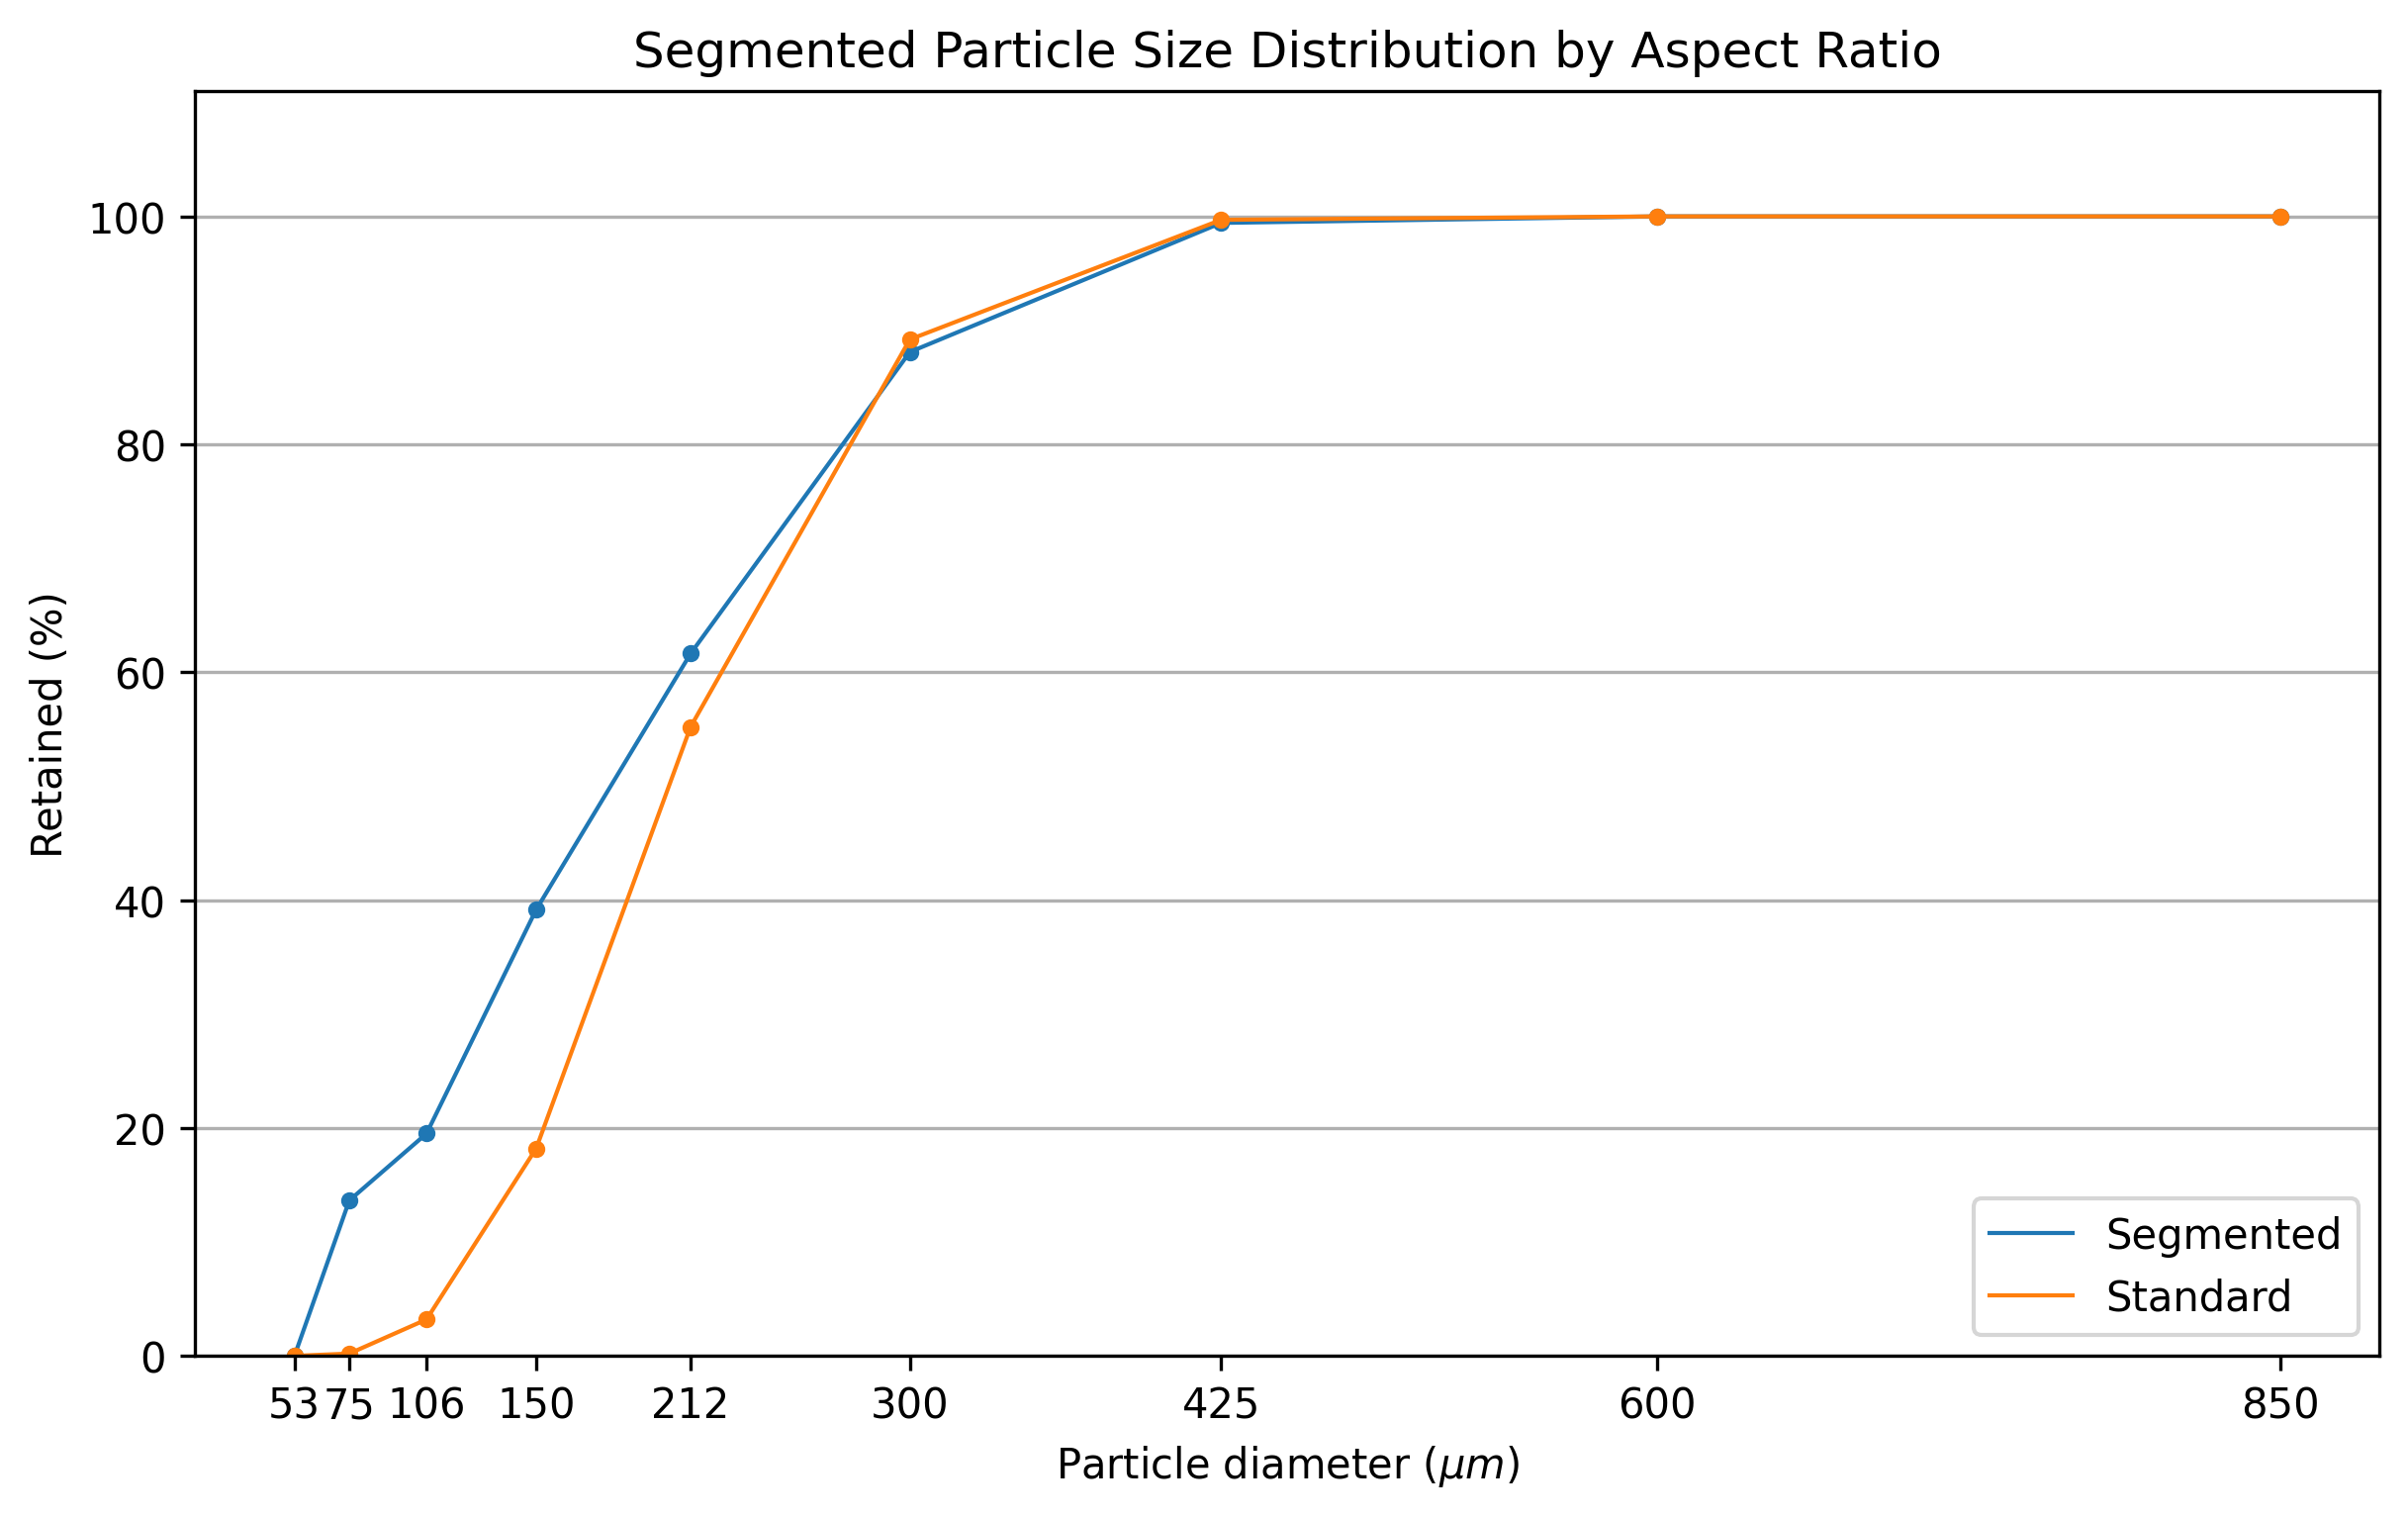

Minimum peak distance: 2
CT resolution: 18.39915
Loading images...
--> Images loaded as 3D array:  (160, 240, 240)
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(pct_particles)=array([  0.        ,  12.38591917,  16.51455889,  30.94306823,
        50.32594524,  80.87787918,  98.8700565 , 100.        ,
       100.        ])
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(standard_n_particles)=array([  0. ,   0.2,   3.2,  18.2,  55.2,  89.2,  99.7, 100. , 100. ])


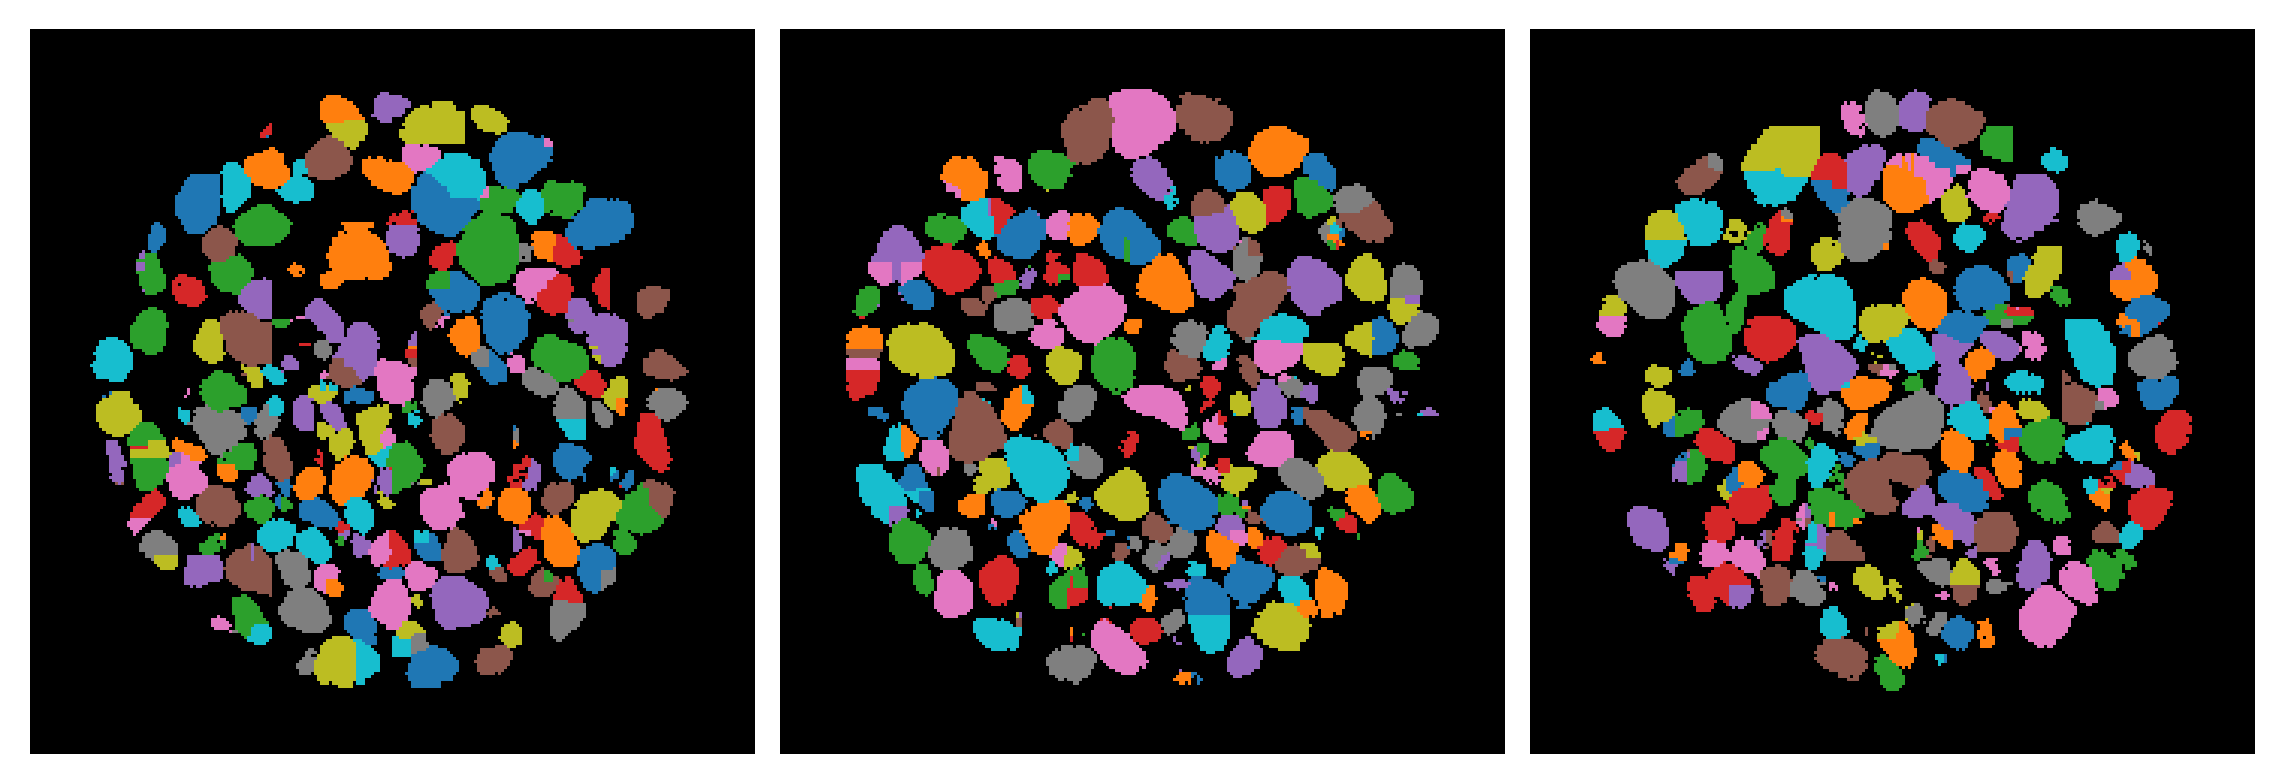

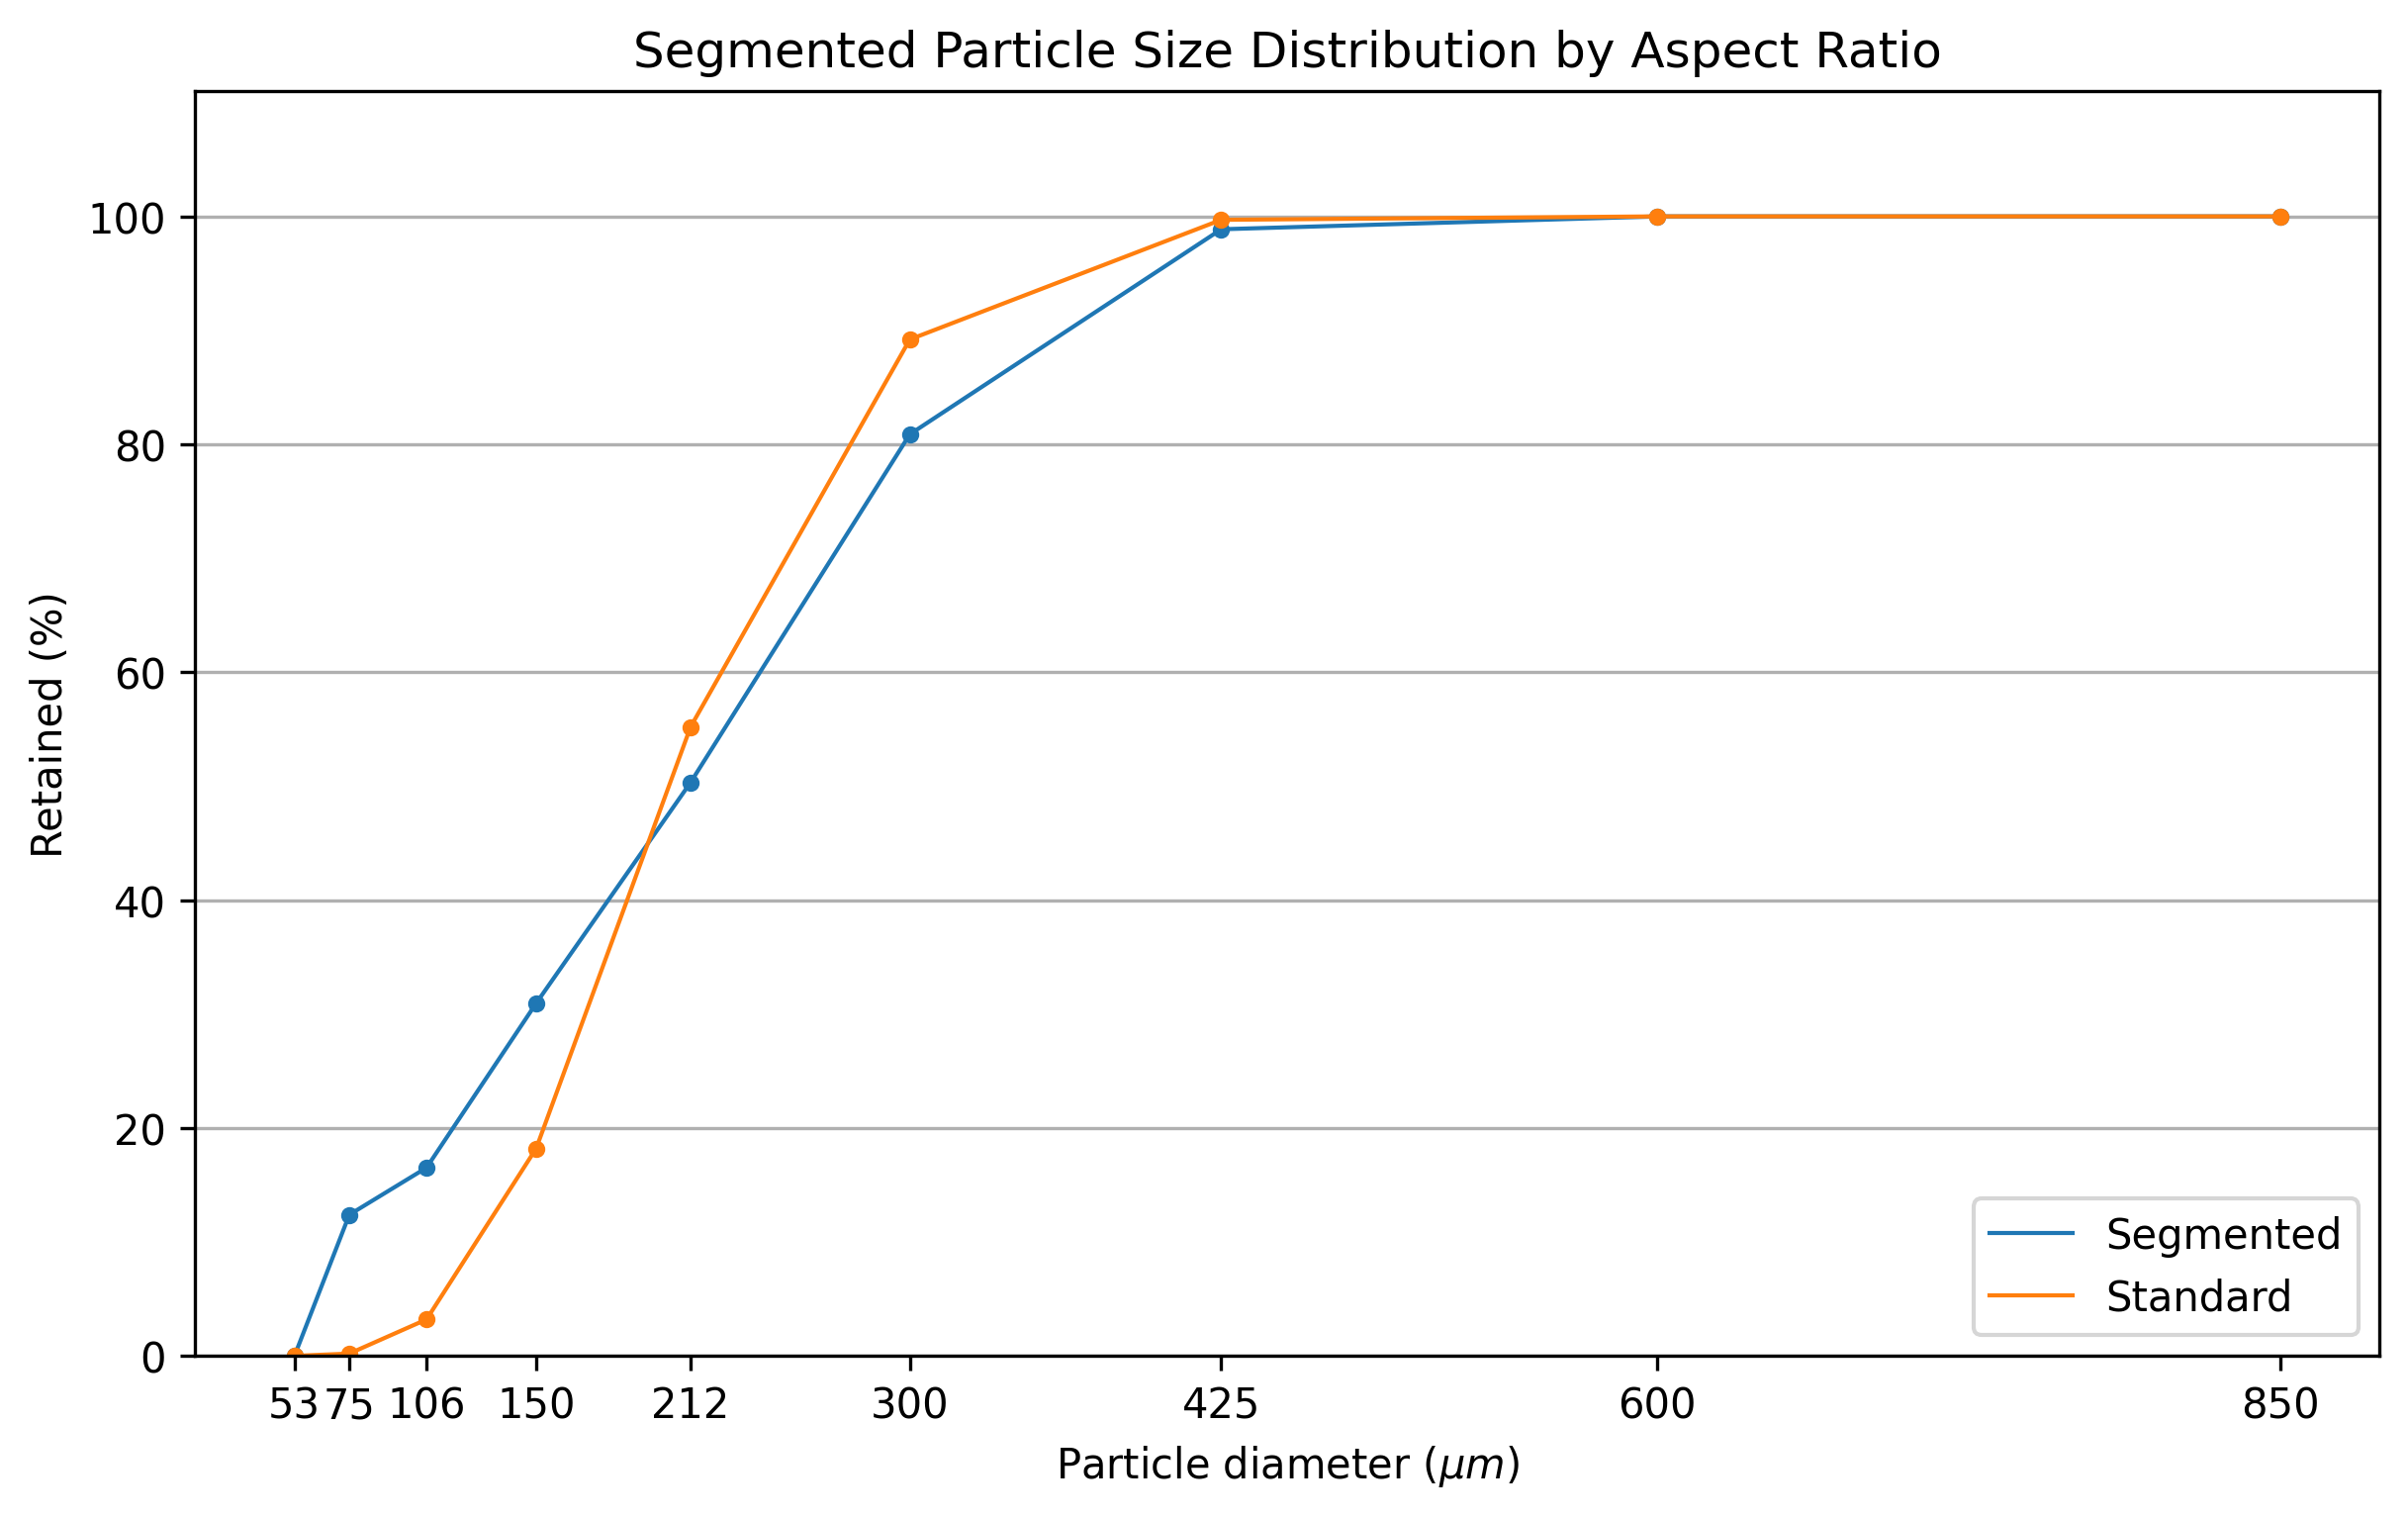

Minimum peak distance: 3
CT resolution: 18.39915
Loading images...
--> Images loaded as 3D array:  (160, 240, 240)
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(pct_particles)=array([  0.        ,   4.29967427,   6.31921824,  16.87296417,
        33.94136808,  71.46579805,  97.19869707, 100.        ,
       100.        ])
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(standard_n_particles)=array([  0. ,   0.2,   3.2,  18.2,  55.2,  89.2,  99.7, 100. , 100. ])


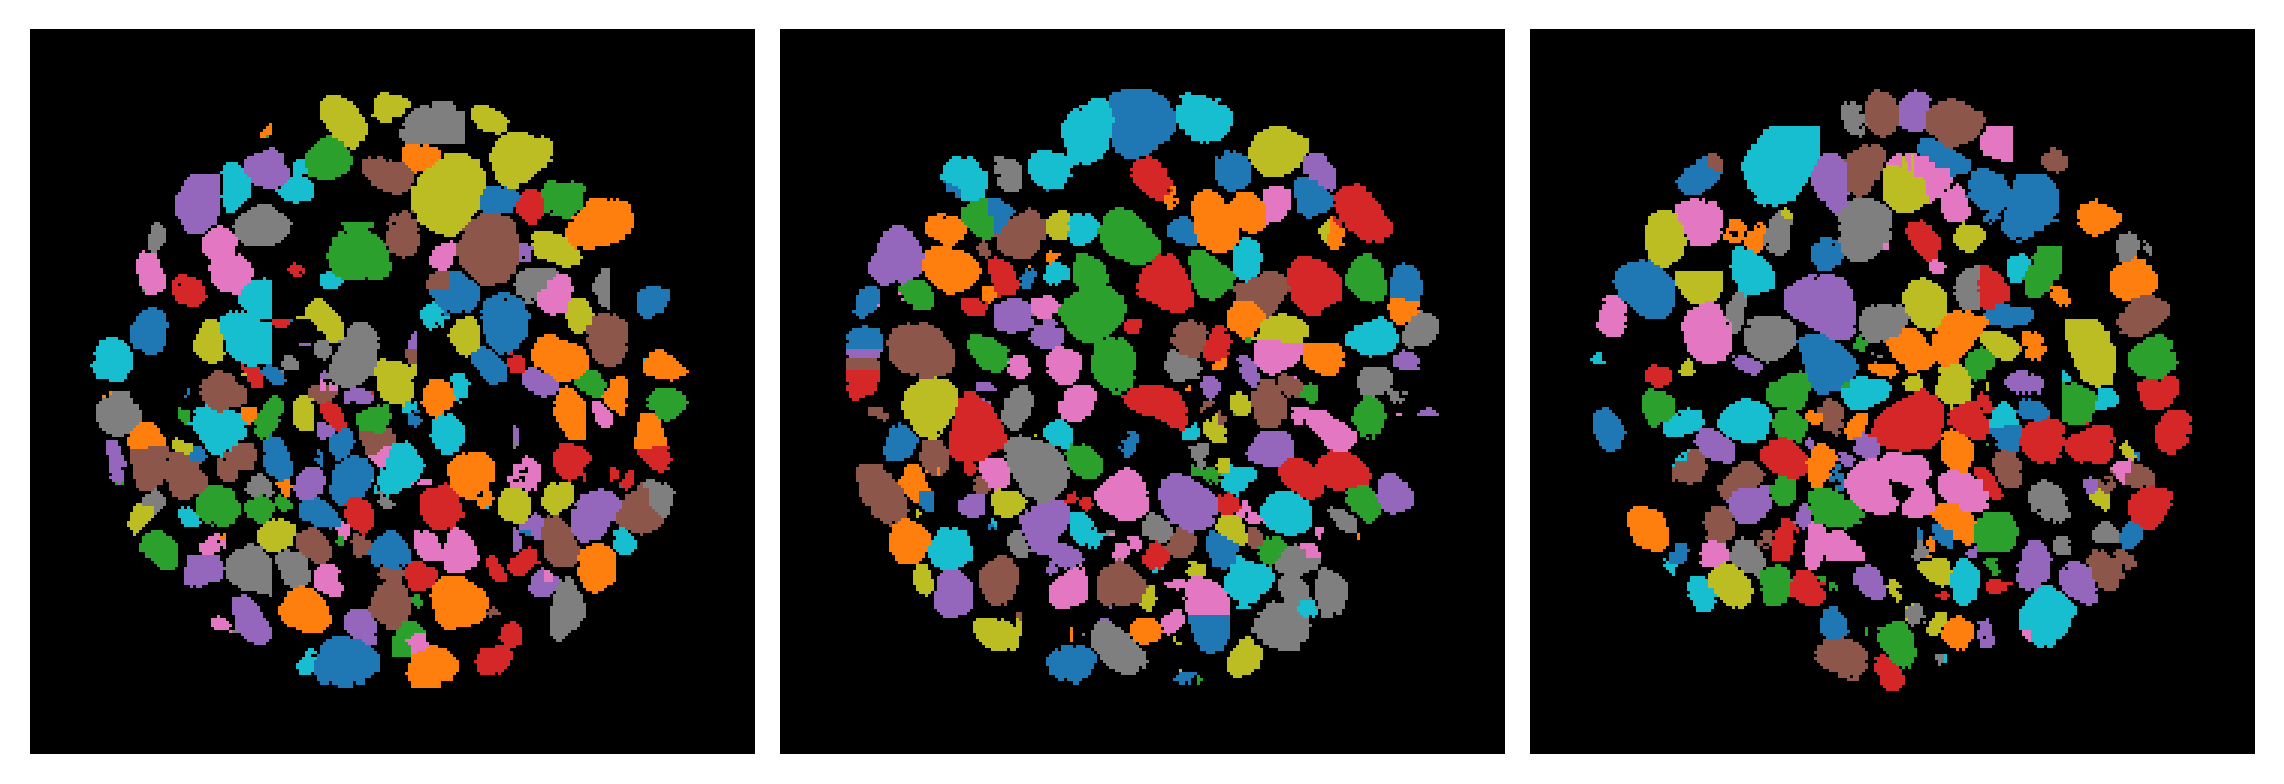

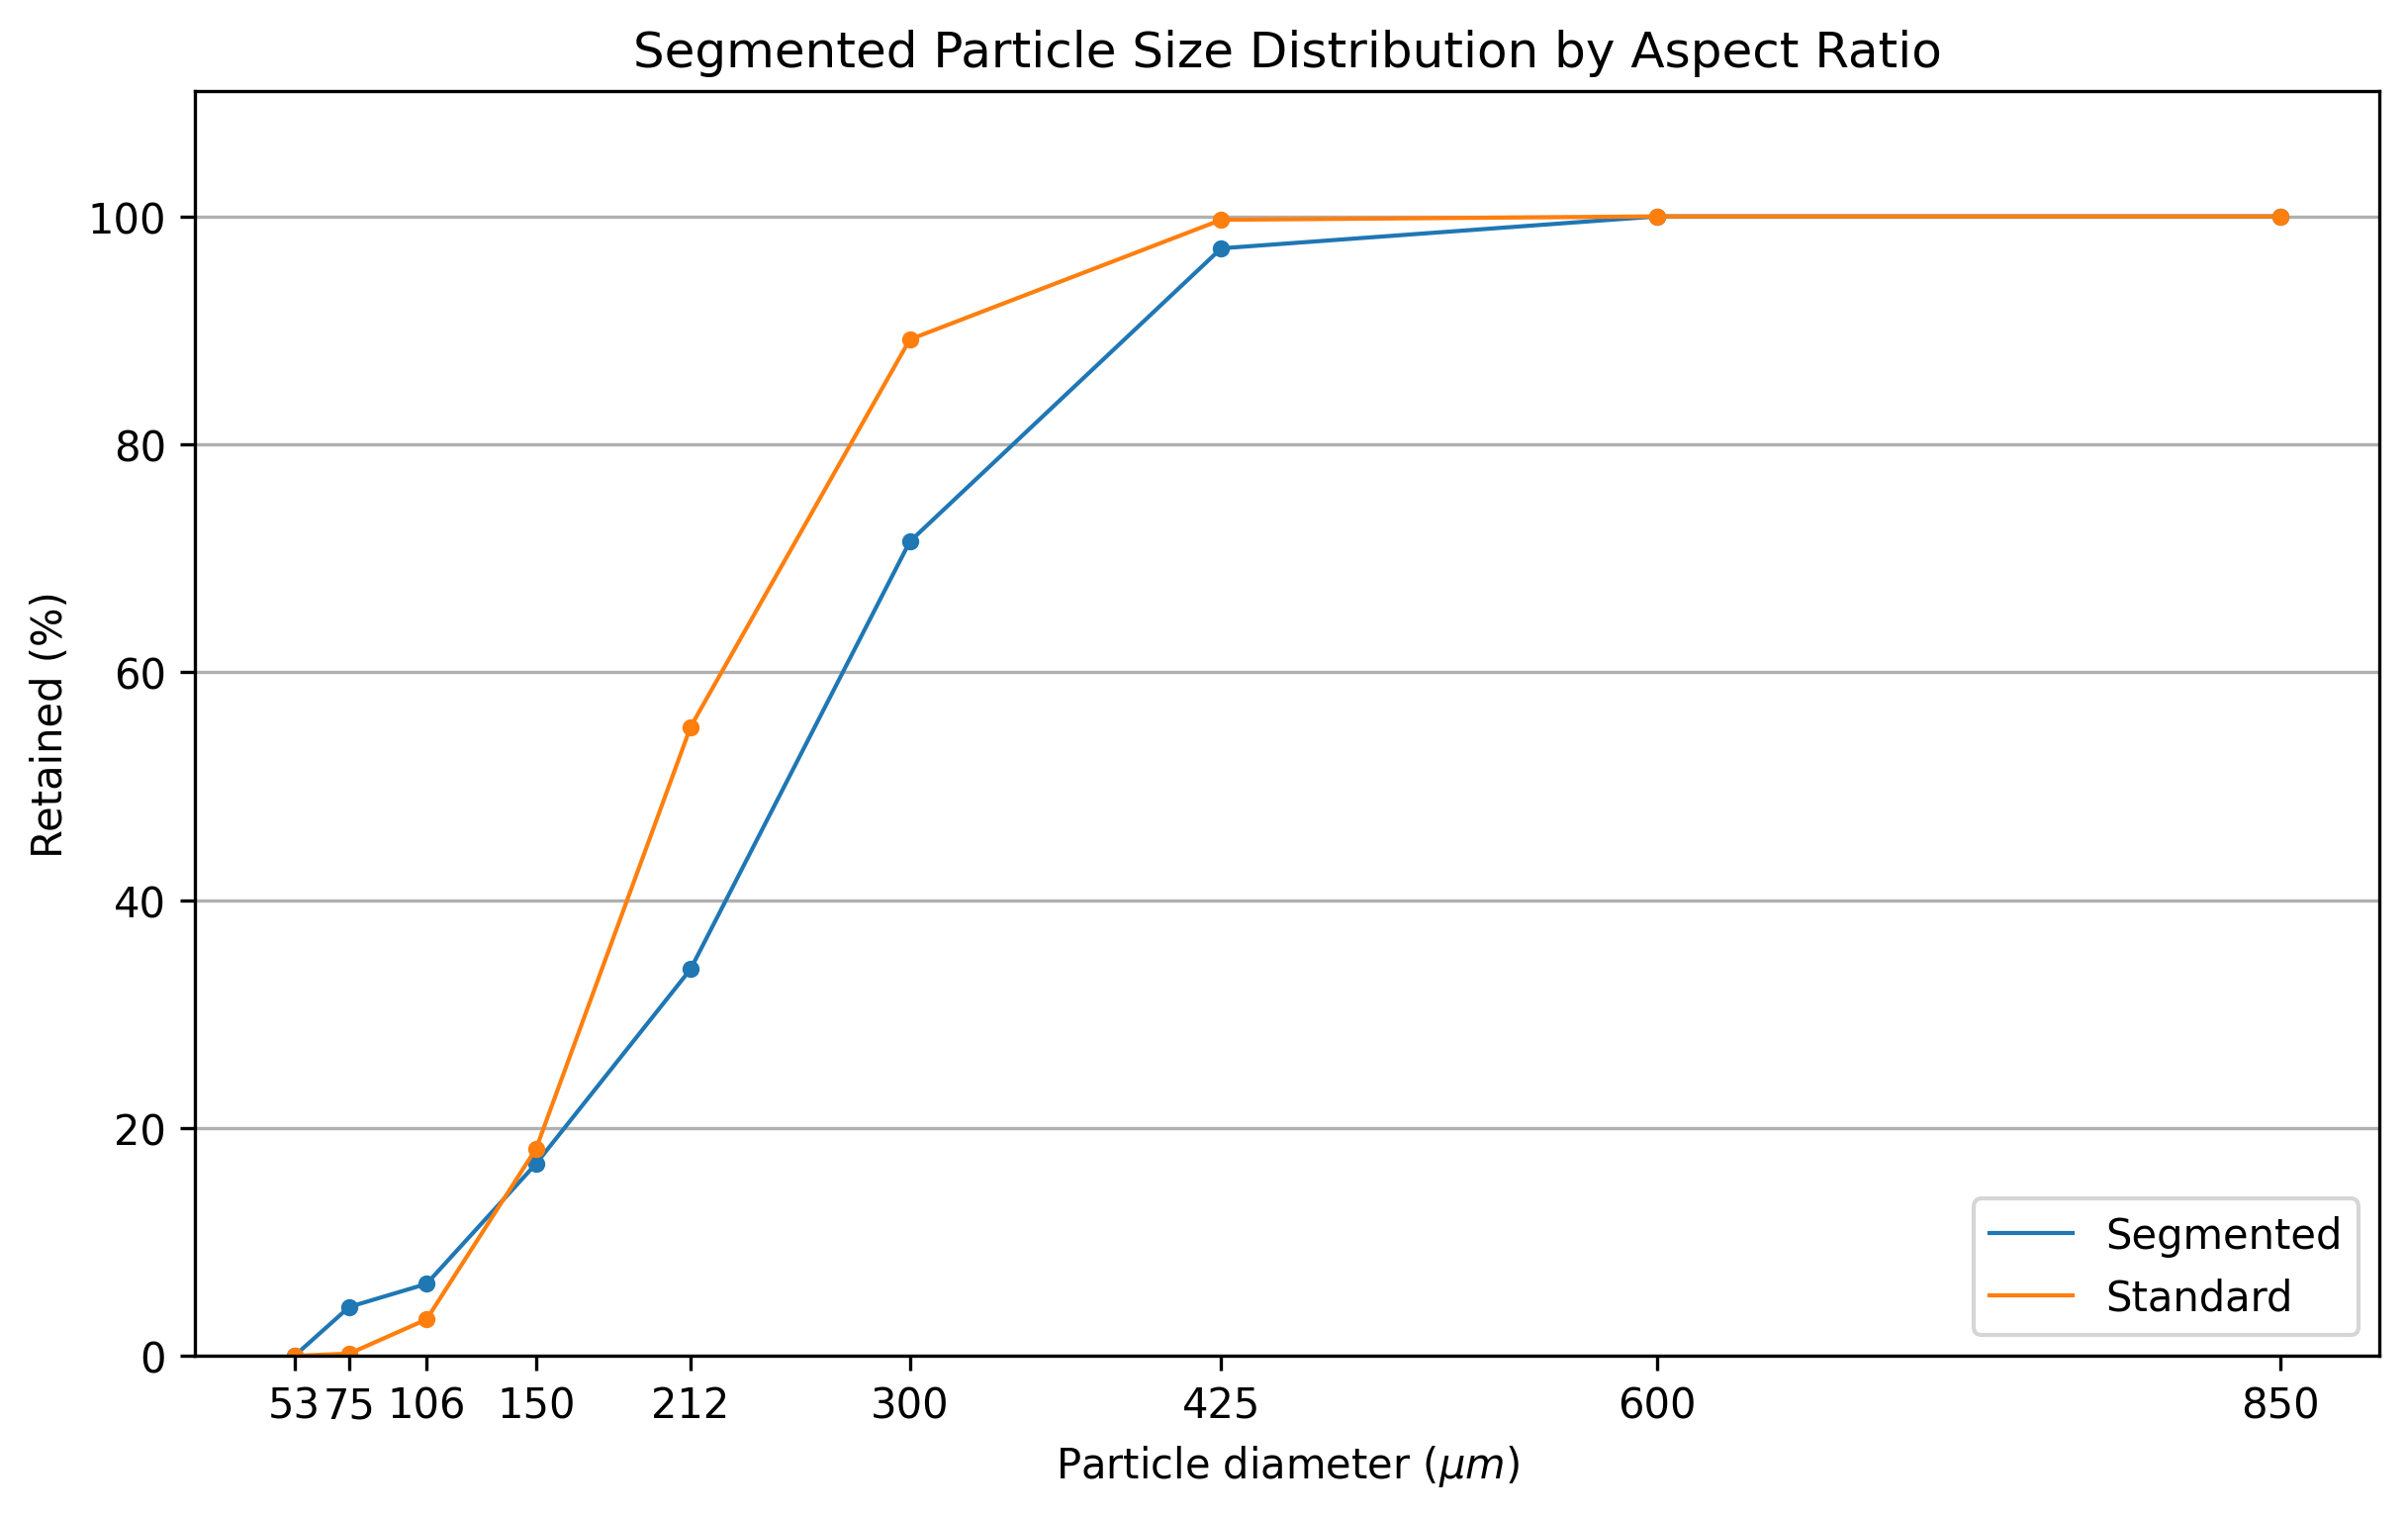

In [21]:
n_grid_voxels = 160
ct_res = 18.39915
for mpd in range(1, 4):
    print('Minimum peak distance:', mpd)
    print('CT resolution:', ct_res)
    img_dir_path = Path(
        f'segmentflow_output/output_{str(n_grid_voxels).zfill(3)}_{mpd}mpd'
        f'/output_{str(n_grid_voxels).zfill(3)}_labeled_voxels')
    imgs_labeled = segment.load_images(img_dir_path, file_suffix='tif')
    fig, axes = view.plot_color_labels(
        imgs_labeled, nslices=3, exclude_bounding_slices=True, fig_w=7.5,
        dpi=300
    )
    # Based on IDOX "Full Production" doc
    # idox_bin_edges = np.array([0, 45, 75, 150, 300])
    # idox_standard = [33, 17, 0, 47.5]
    f50_bin_edges = [53,  75, 106, 150, 212, 300,  425, 600, 850]
    f50_standard =  [ 0, 0.2,   3,  15,  37,  34, 10.5, 0.3,   0]
    dims_df = get_dims_df(imgs_labeled)
    n_particles, sieve_sizes = simulate_sieve(
        dims_df, f50_bin_edges, pixel_res=ct_res)
    fig, ax = grading_curve(
        n_particles, f50_bin_edges, standard_n_particles=f50_standard)
    plt.show()

## Output 320, MPD 1 - 4

Minimum peak distance: 1
CT resolution: 9.199575
Loading images...
--> Images loaded as 3D array:  (320, 480, 480)
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(pct_particles)=array([  0.        ,  12.01035375,  23.00258844,  45.28041415,
        72.42450388,  93.01121657,  99.86194996, 100.        ,
       100.        ])
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(standard_n_particles)=array([  0. ,   0.2,   3.2,  18.2,  55.2,  89.2,  99.7, 100. , 100. ])


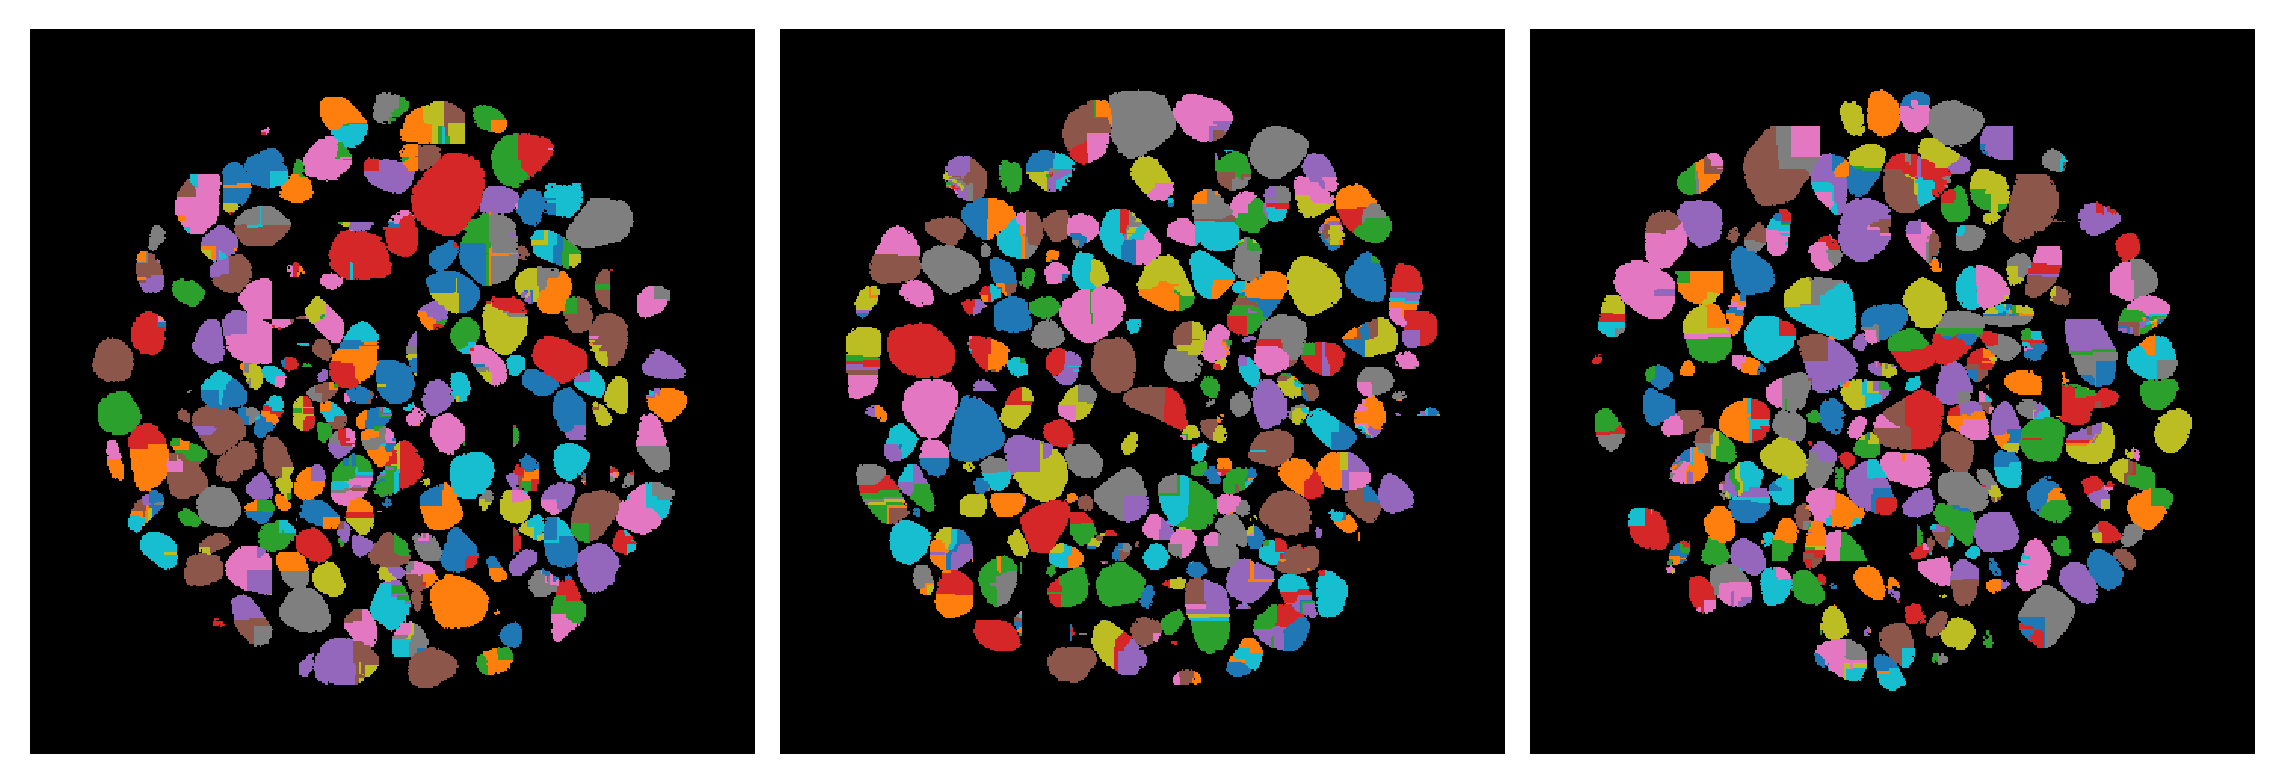

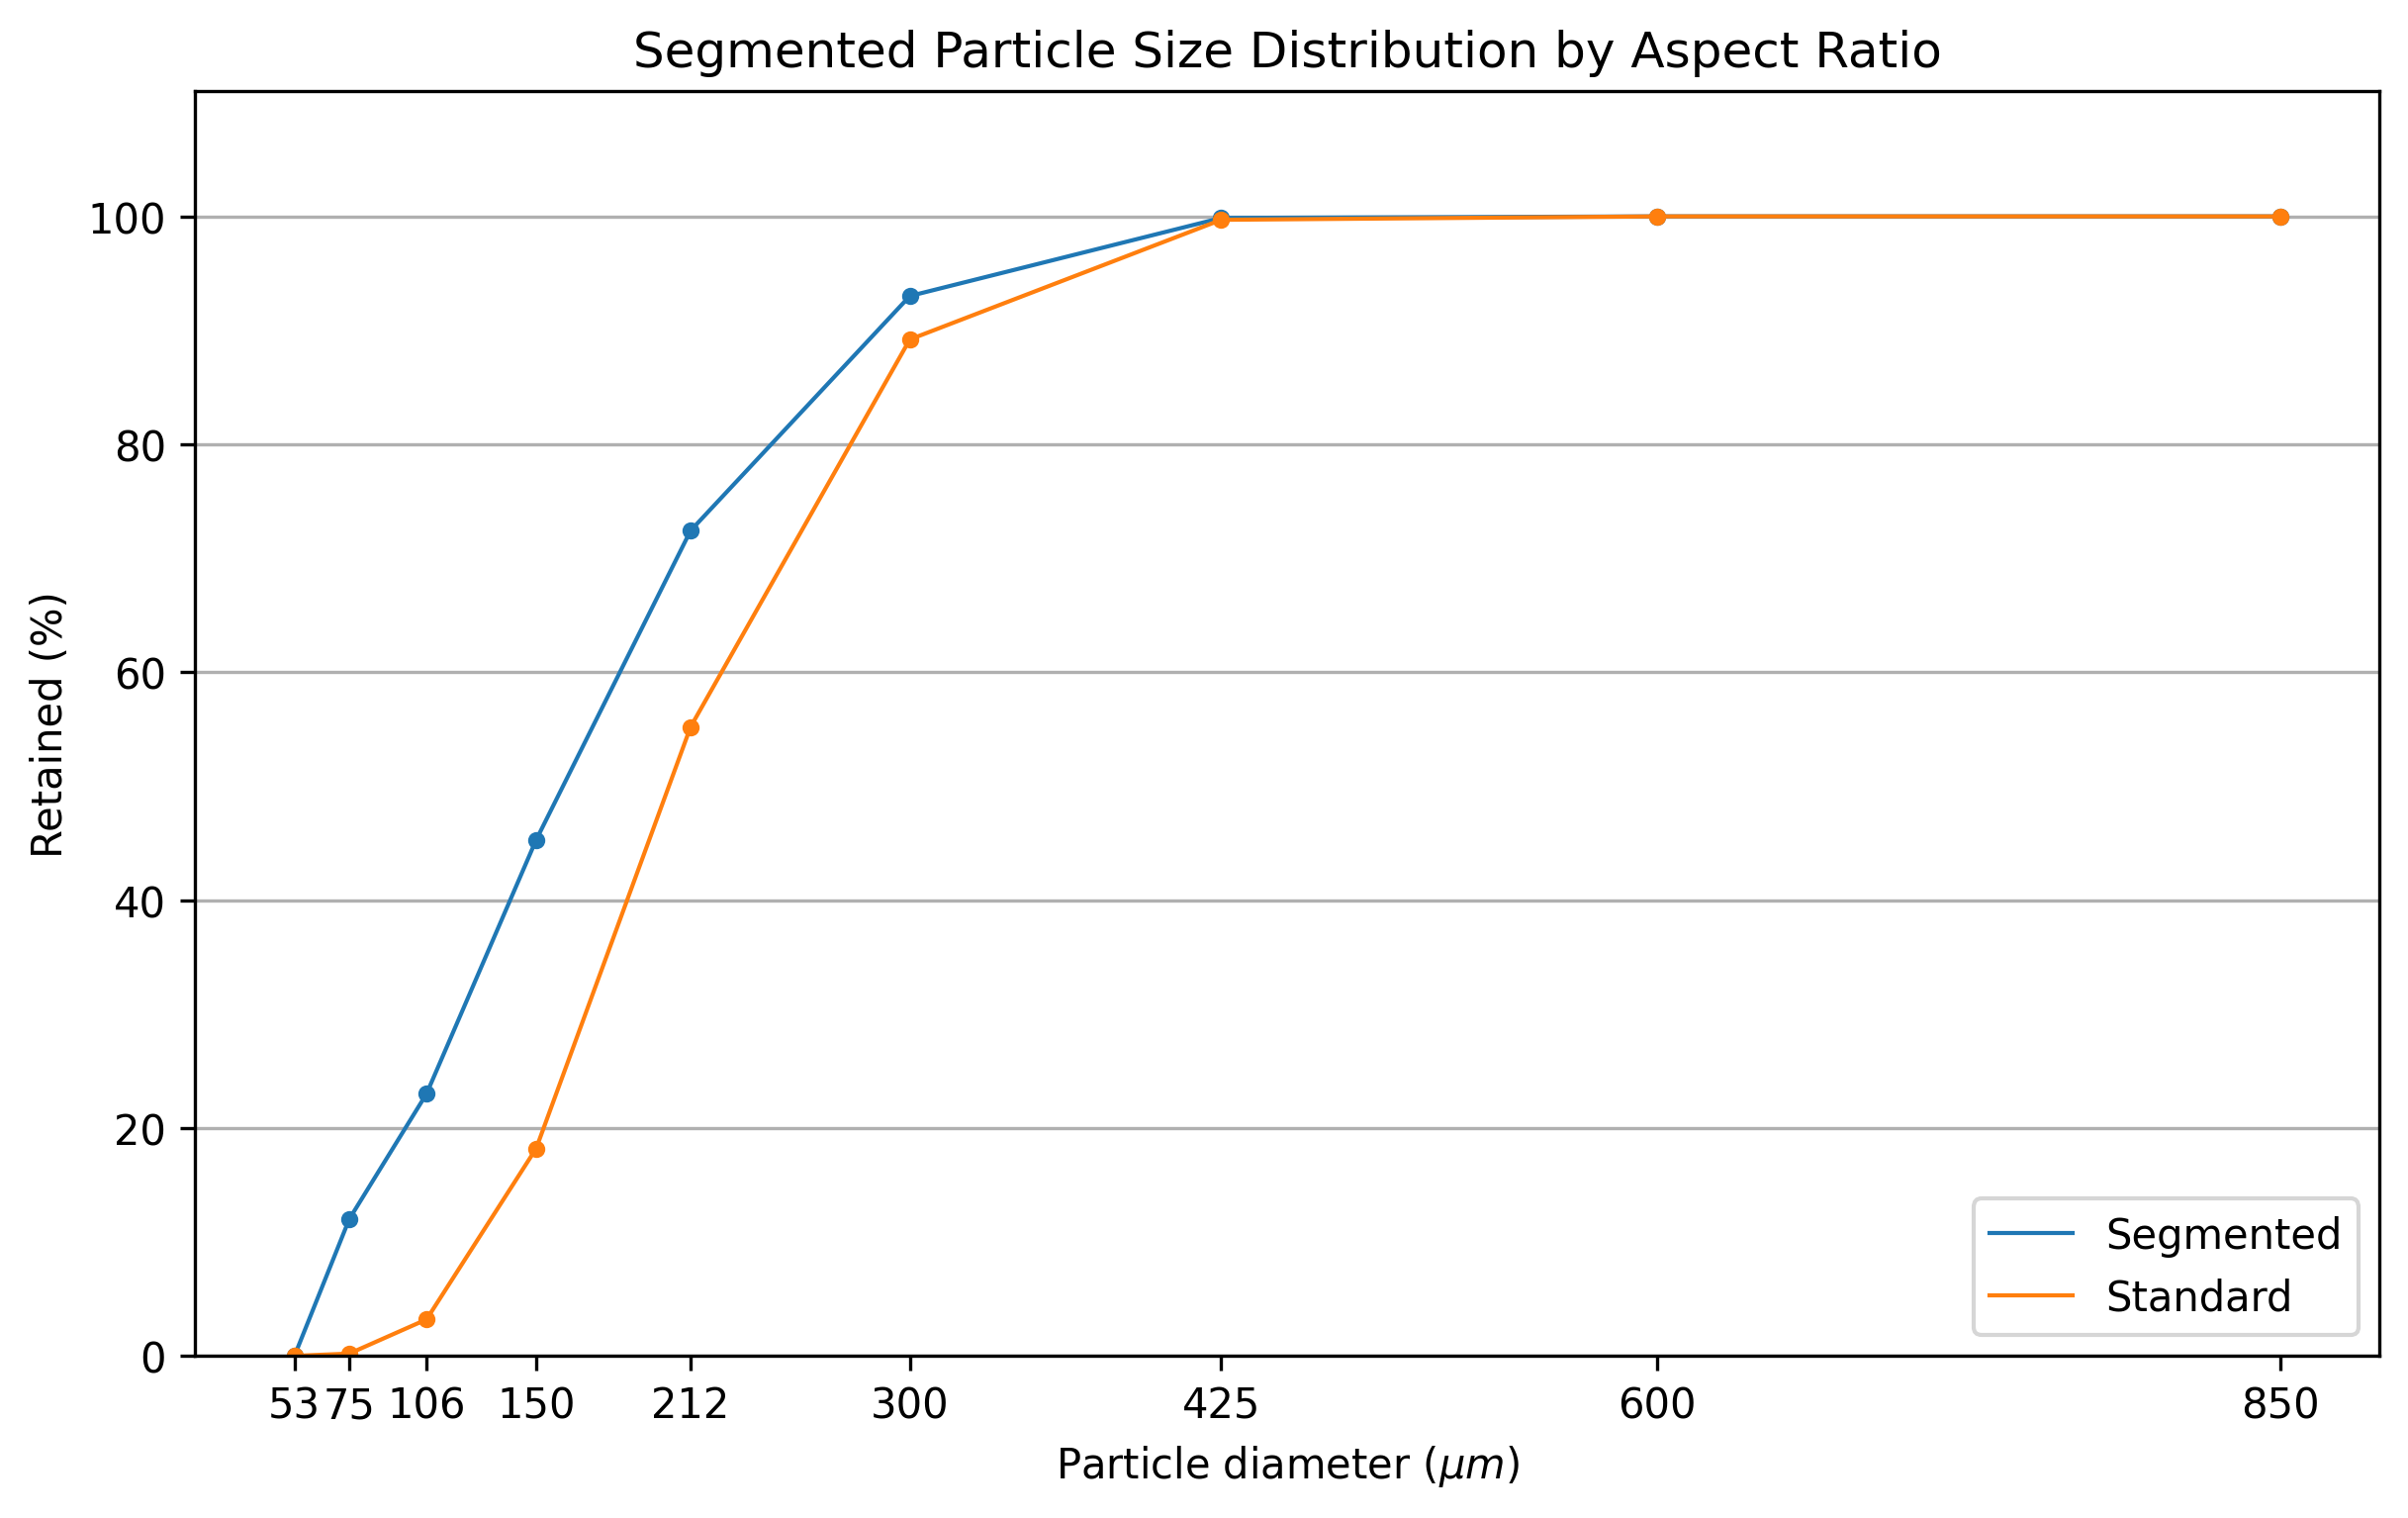

Minimum peak distance: 2
CT resolution: 9.199575
Loading images...
--> Images loaded as 3D array:  (320, 480, 480)
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(pct_particles)=array([  0.        ,  13.23097027,  21.00620712,  37.04671676,
        59.88239138,  86.83436785,  99.41195688, 100.        ,
       100.        ])
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(standard_n_particles)=array([  0. ,   0.2,   3.2,  18.2,  55.2,  89.2,  99.7, 100. , 100. ])


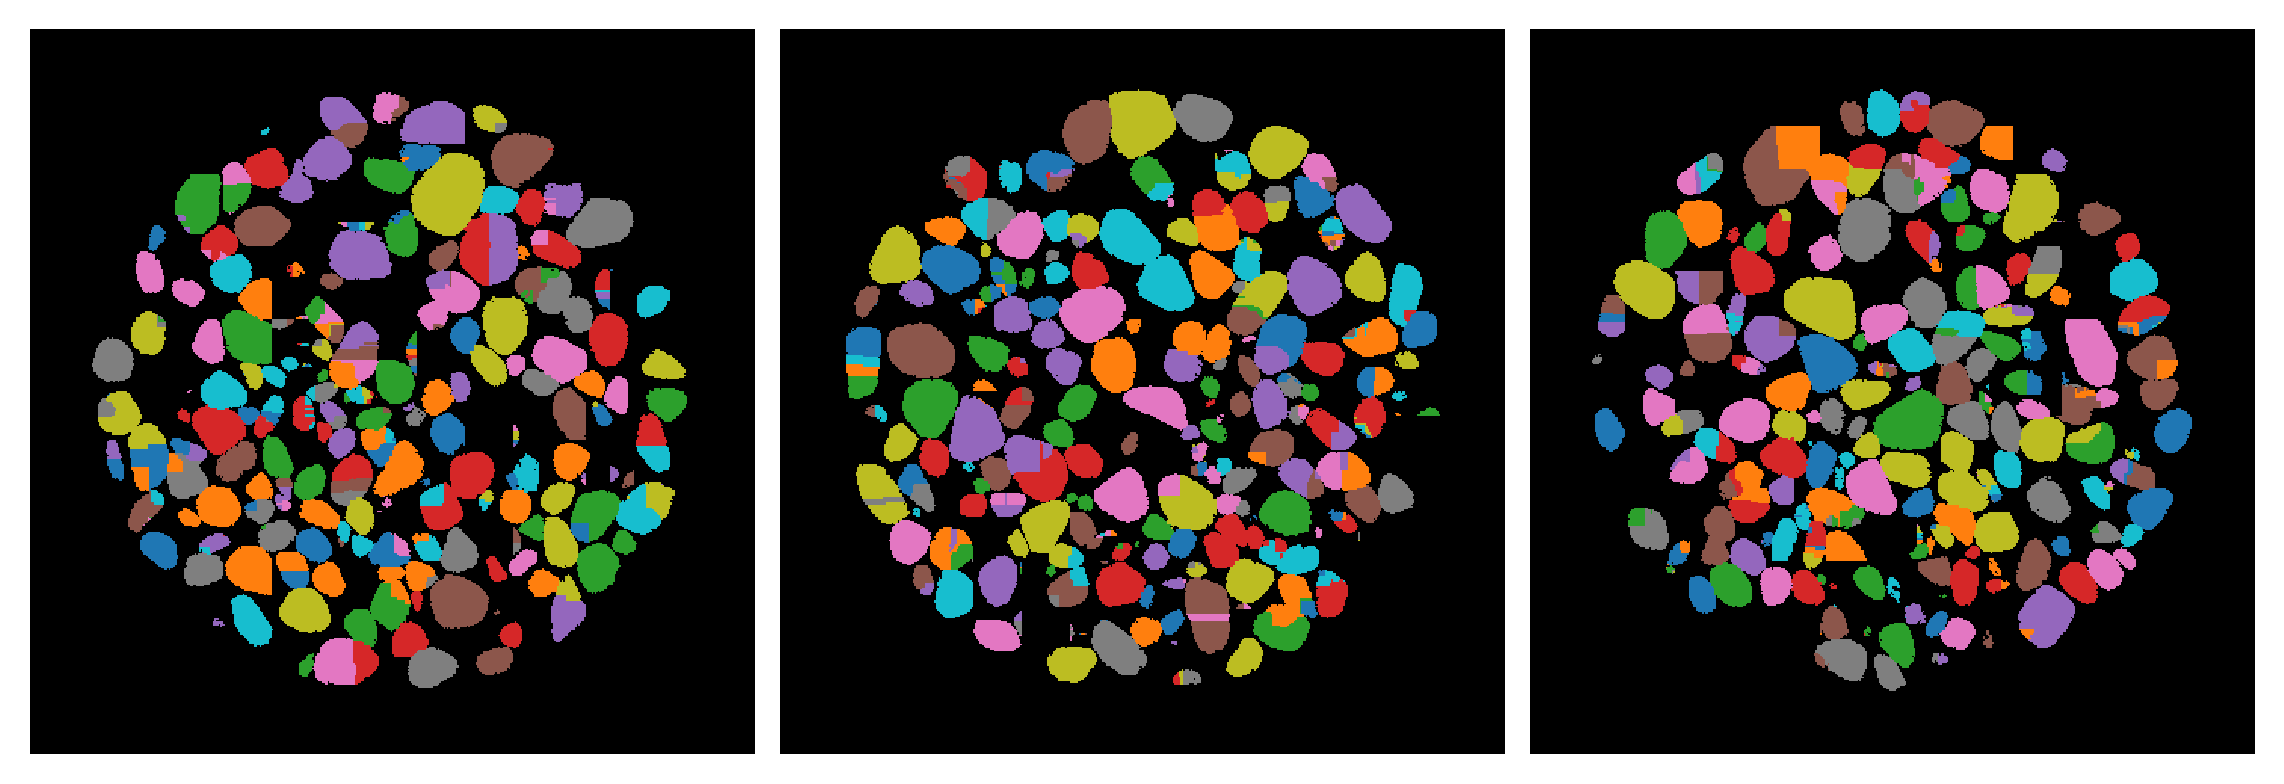

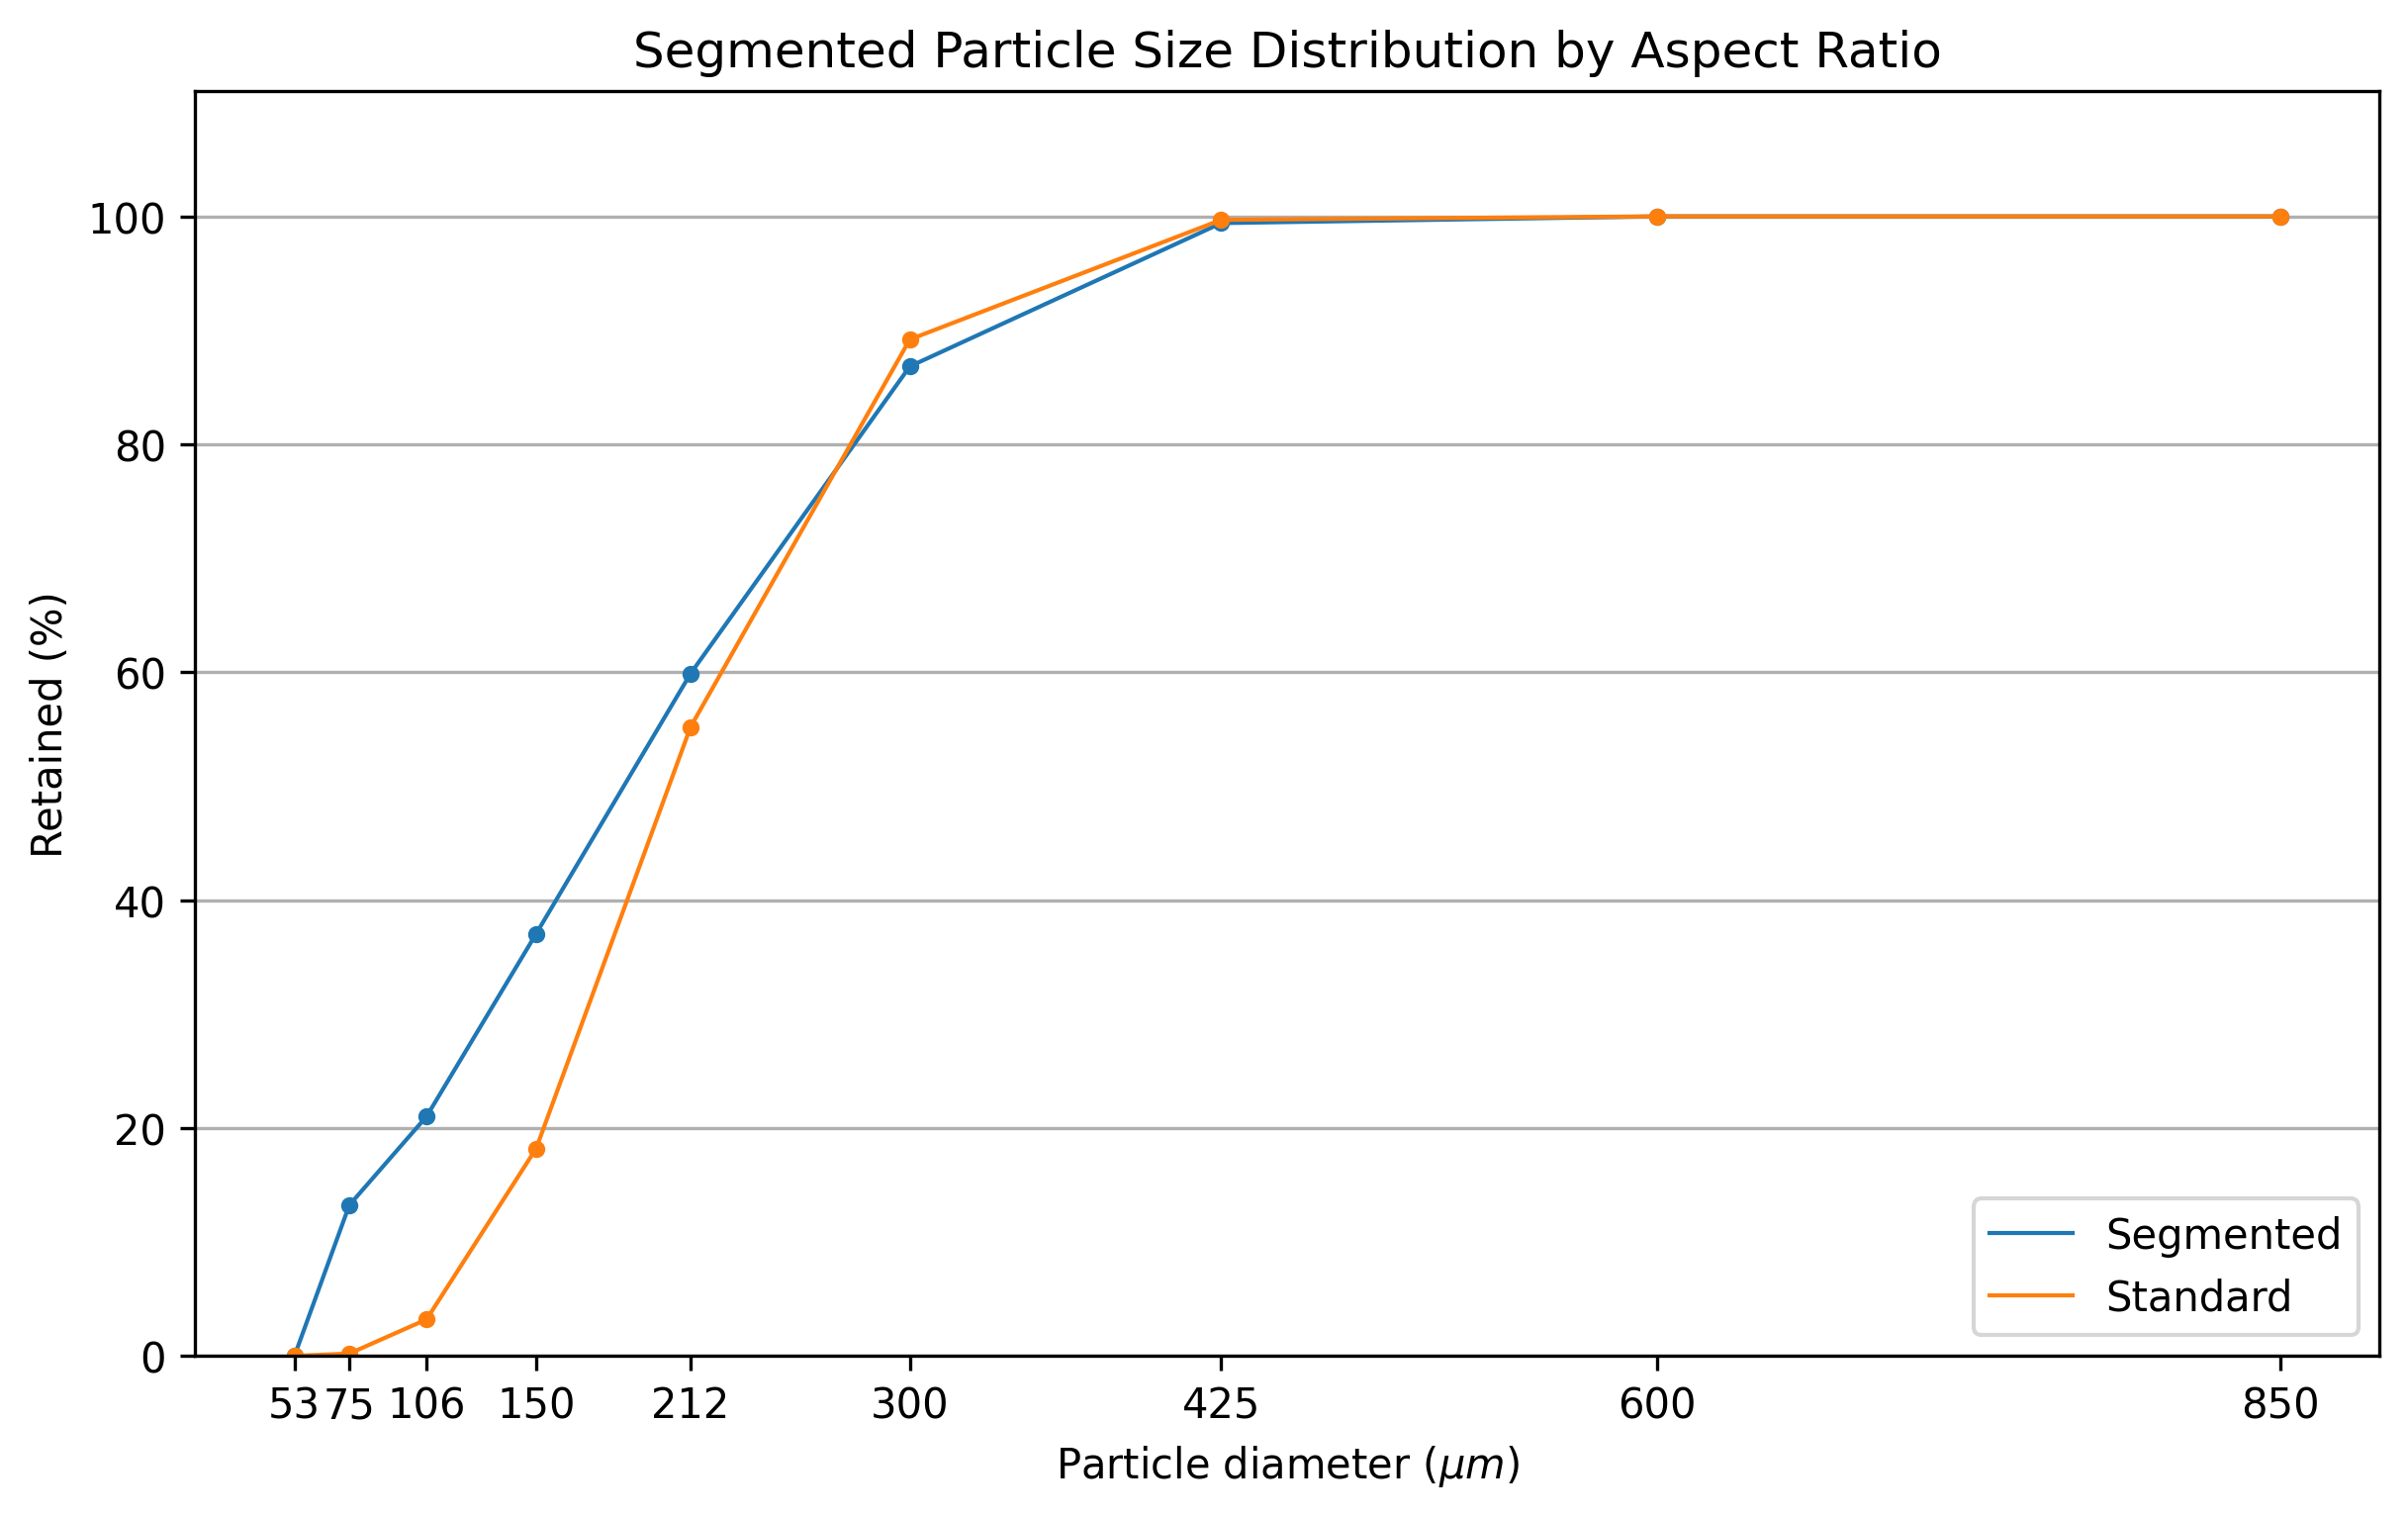

Minimum peak distance: 3
CT resolution: 9.199575
Loading images...
--> Images loaded as 3D array:  (320, 480, 480)
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(pct_particles)=array([  0.        ,  10.05639098,  17.0112782 ,  29.69924812,
        51.5037594 ,  80.92105263,  98.87218045, 100.        ,
       100.        ])
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(standard_n_particles)=array([  0. ,   0.2,   3.2,  18.2,  55.2,  89.2,  99.7, 100. , 100. ])


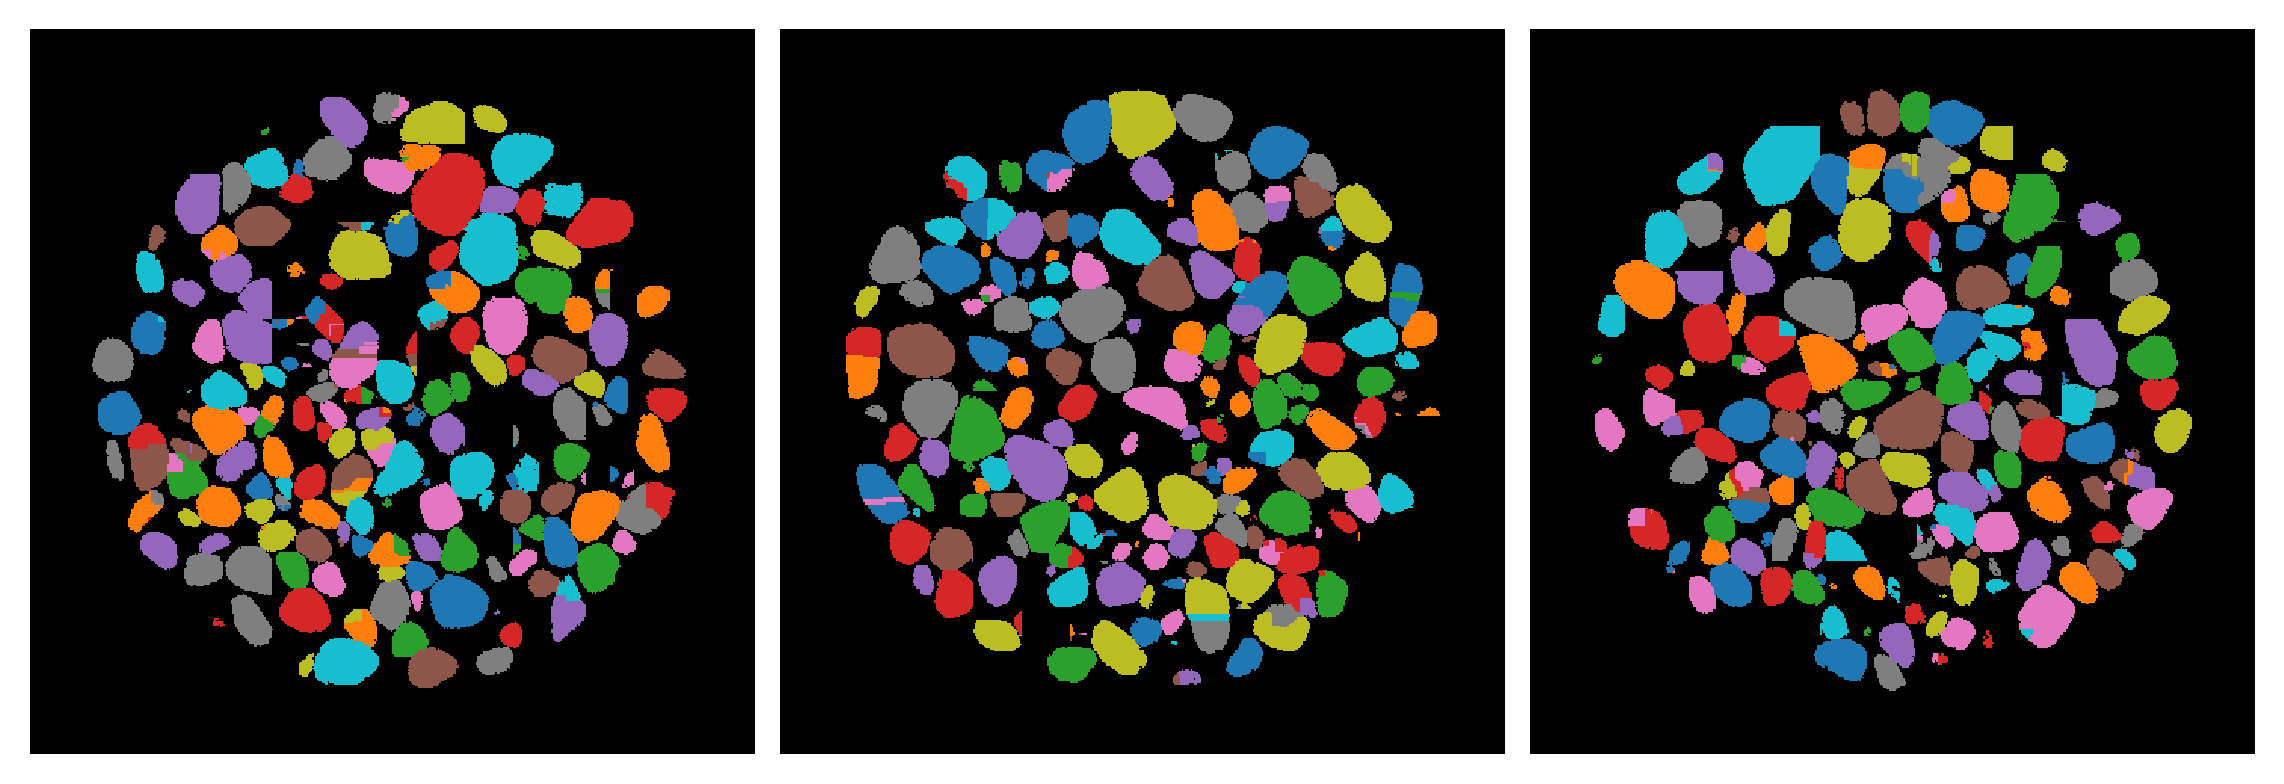

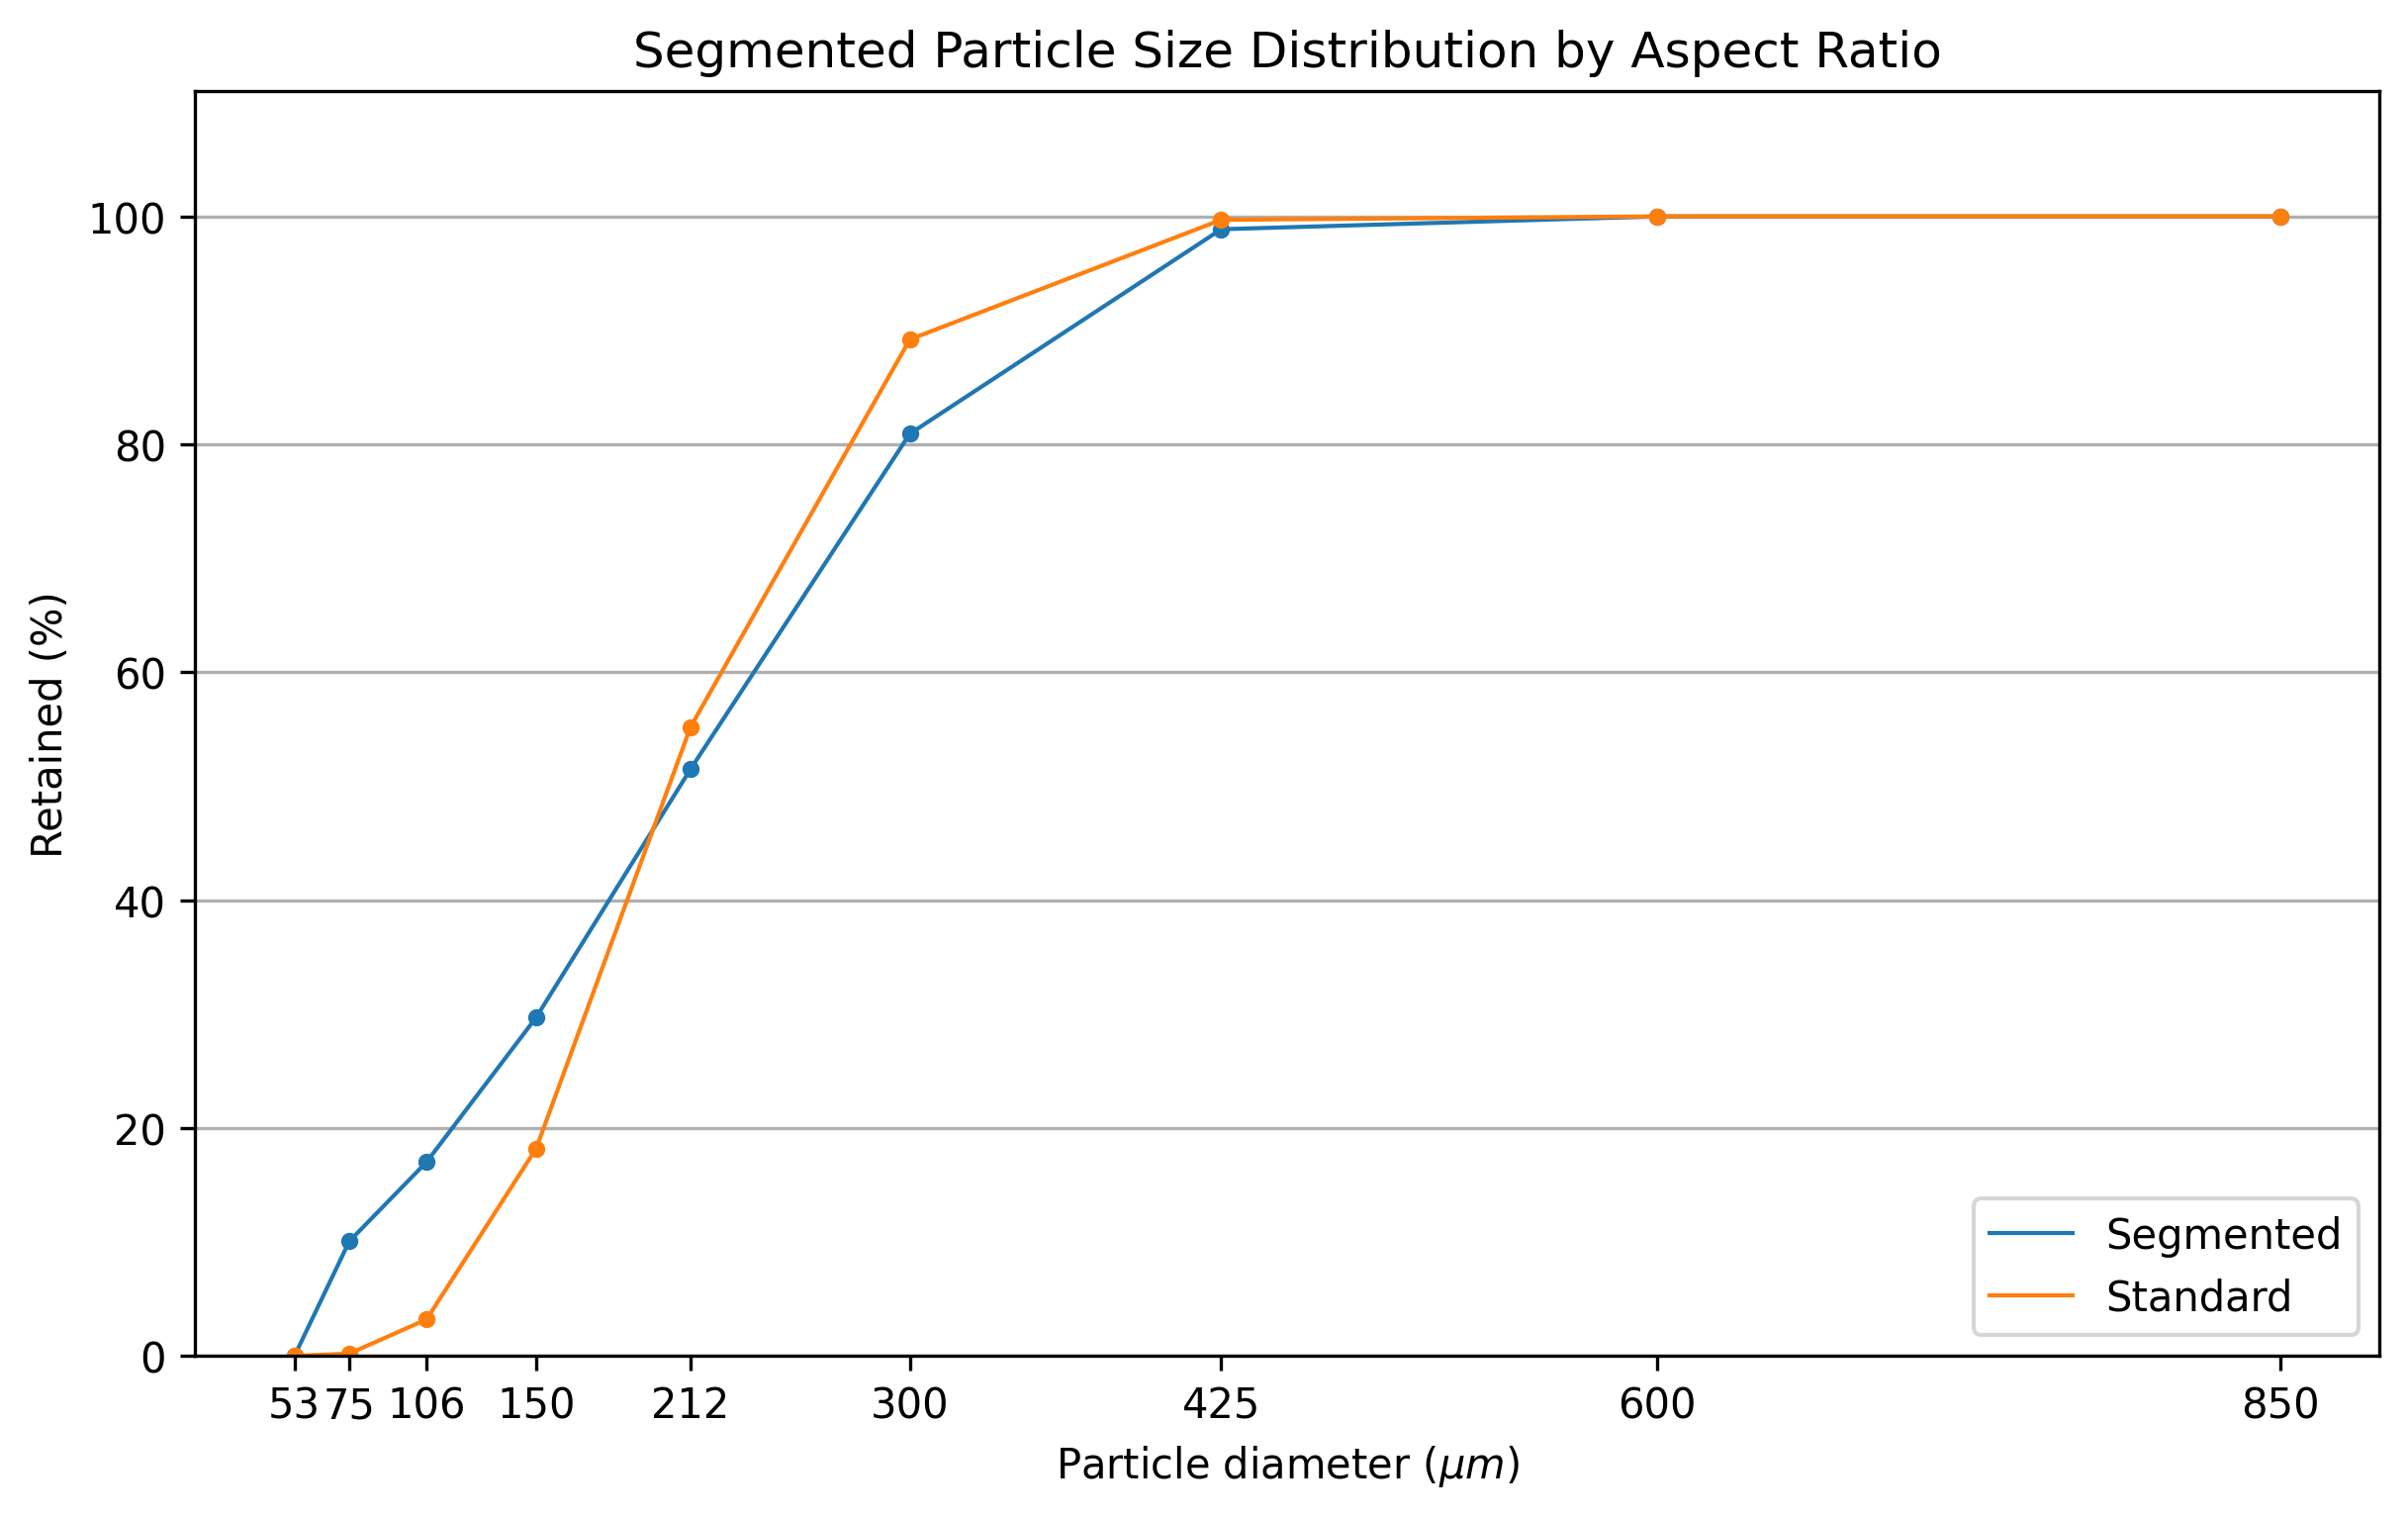

Minimum peak distance: 4
CT resolution: 9.199575
Loading images...
--> Images loaded as 3D array:  (320, 480, 480)
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(pct_particles)=array([  0.        ,   4.71535365,  10.40828062,  22.71420357,
        44.27832087,  76.94077056,  98.38987924, 100.        ,
       100.        ])
sieve_sizes=[53, 75, 106, 150, 212, 300, 425, 600, 850]
np.cumsum(standard_n_particles)=array([  0. ,   0.2,   3.2,  18.2,  55.2,  89.2,  99.7, 100. , 100. ])


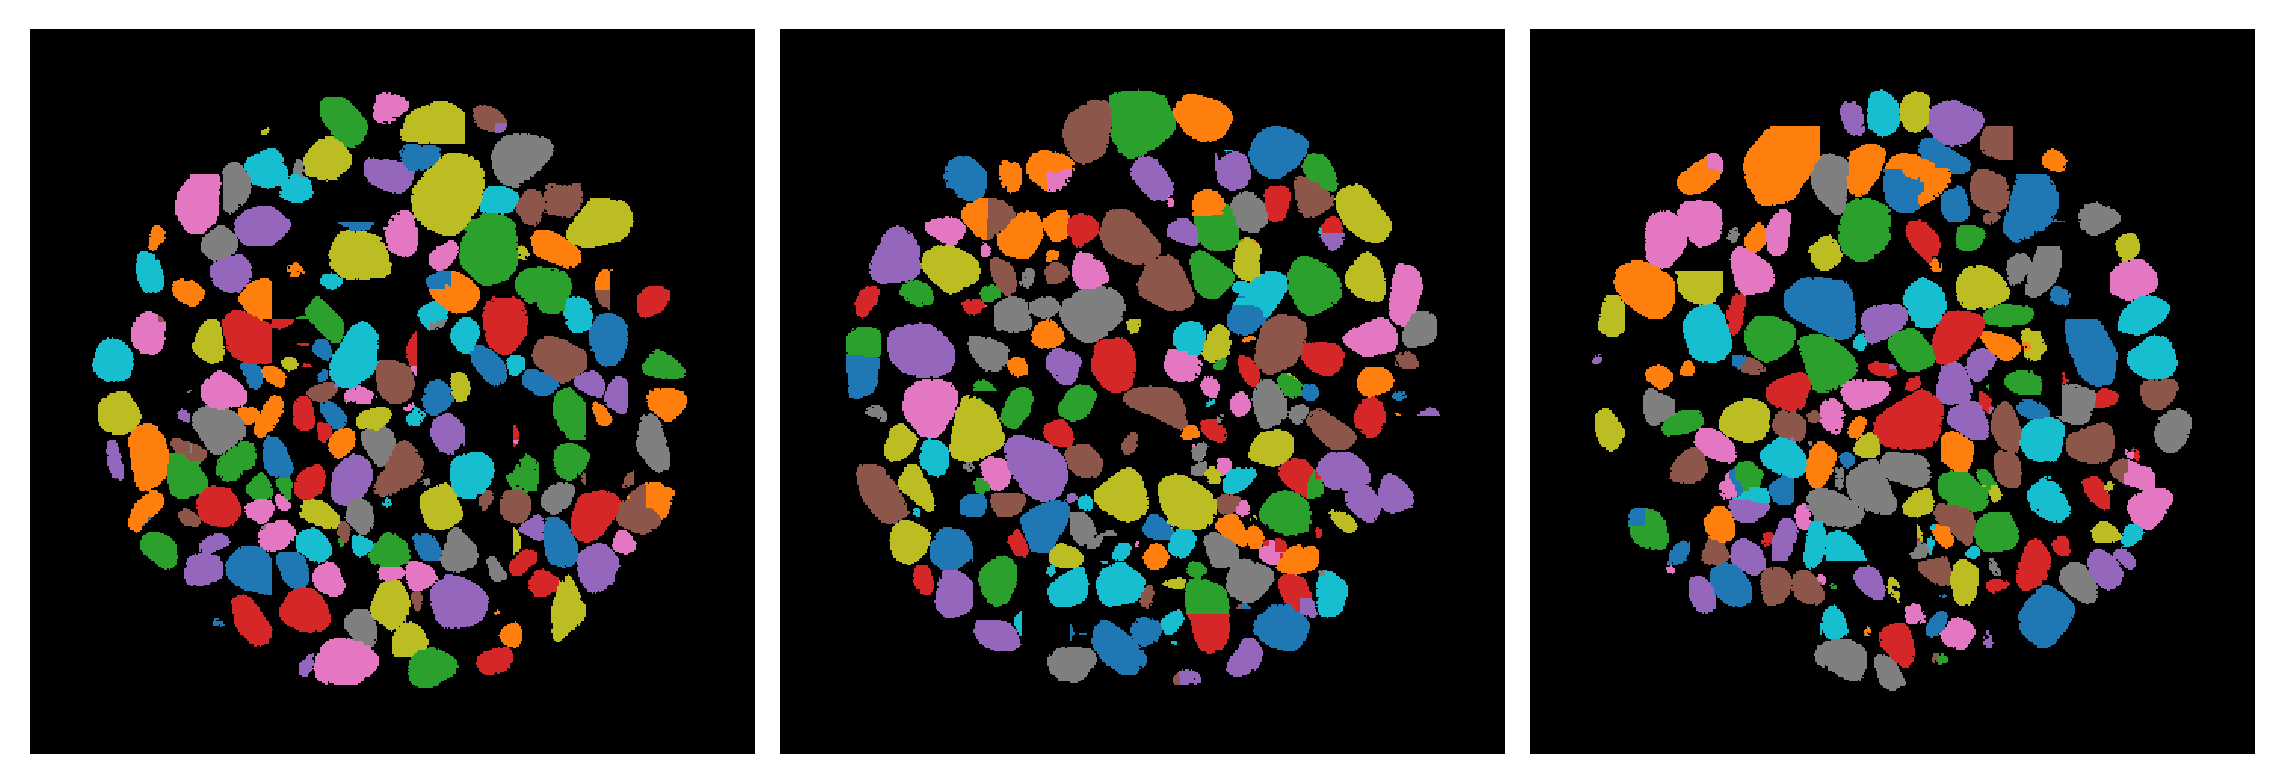

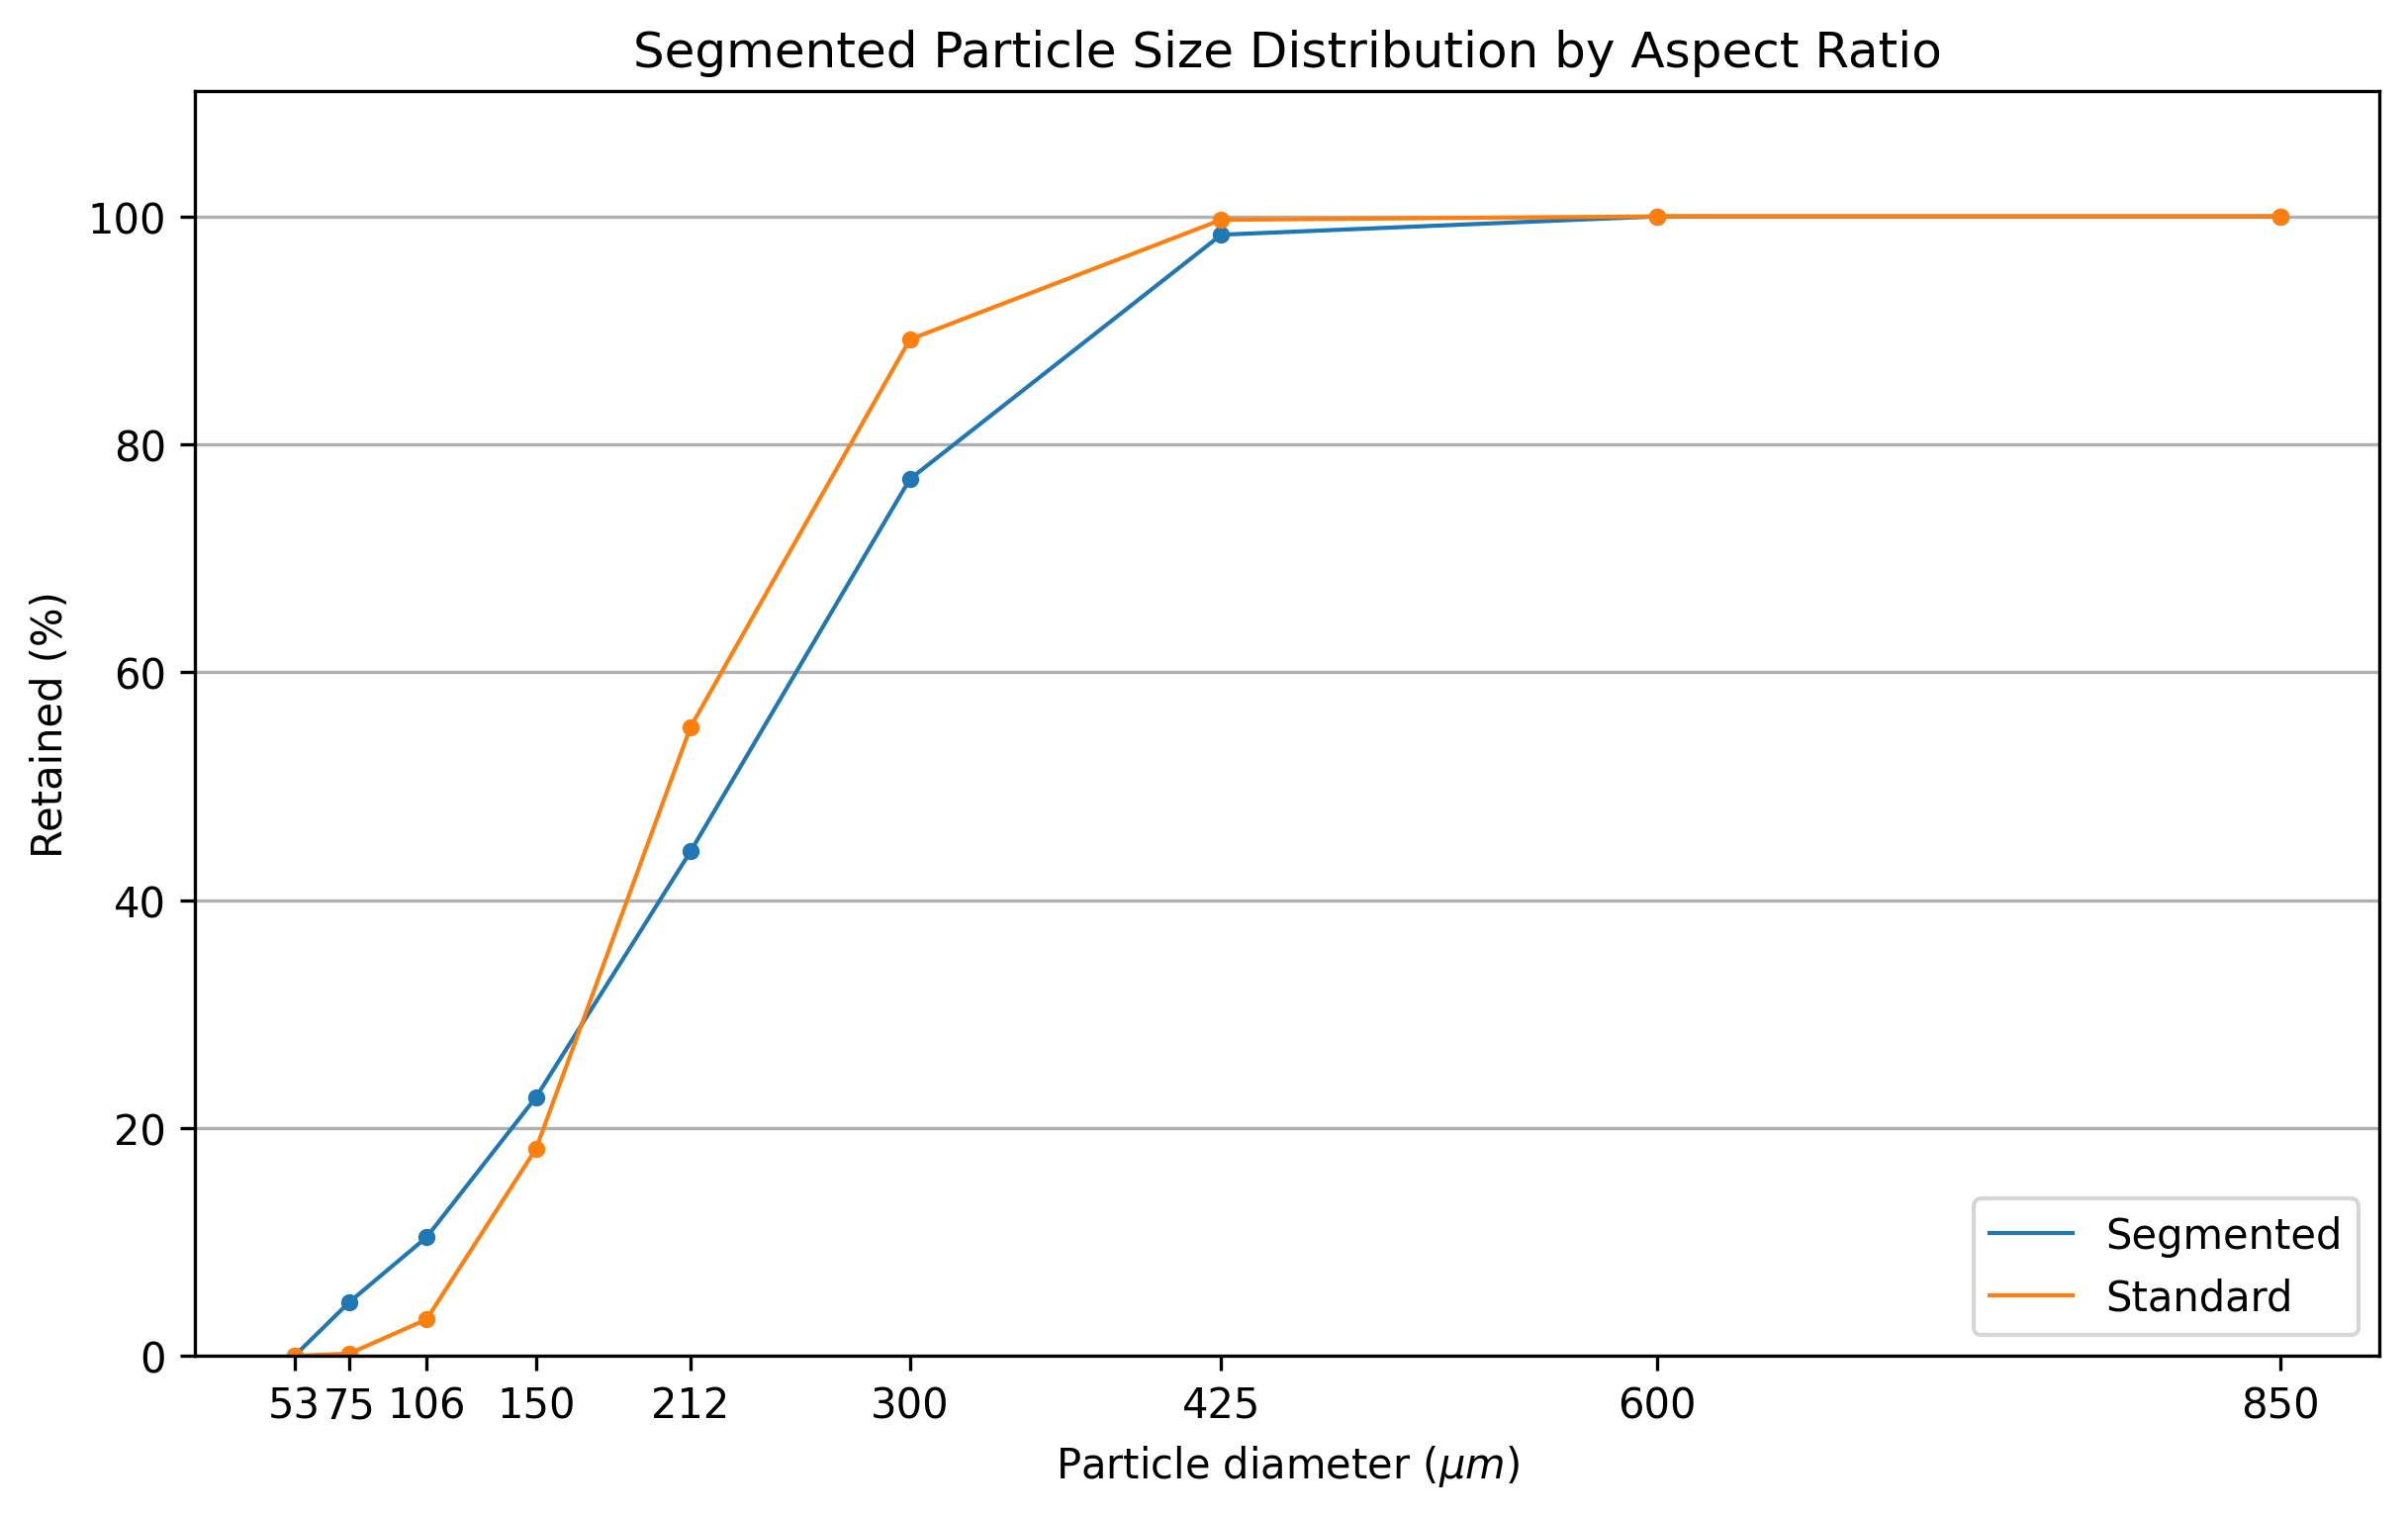

In [22]:
n_grid_voxels = 320
ct_res = 9.199575
for mpd in range(1, 5):
    print('Minimum peak distance:', mpd)
    print('CT resolution:', ct_res)
    img_dir_path = Path(
        f'segmentflow_output/output_{str(n_grid_voxels).zfill(3)}_{mpd}mpd'
        f'/output_{str(n_grid_voxels).zfill(3)}_labeled_voxels')
    imgs_labeled = segment.load_images(img_dir_path, file_suffix='tif')
    fig, axes = view.plot_color_labels(
        imgs_labeled, nslices=3, exclude_bounding_slices=True, fig_w=7.5, dpi=300)
    # Based on IDOX "Full Production" doc
    # idox_bin_edges = np.array([0, 45, 75, 150, 300])
    # idox_standard = [33, 17, 0, 47.5]
    f50_bin_edges = [53,  75, 106, 150, 212, 300,  425, 600, 850]
    f50_standard =  [ 0, 0.2,   3,  15,  37,  34, 10.5, 0.3,   0]
    dims_df = get_dims_df(imgs_labeled)
    n_particles, sieve_sizes = simulate_sieve(
        dims_df, f50_bin_edges, pixel_res=ct_res)
    fig, ax = grading_curve(
        n_particles, f50_bin_edges, standard_n_particles=f50_standard)
    plt.show()